In [21]:
##copied from a note i left in the back stars section
## Haven't got to it yet but i have clustered the stars in this galaxy and will find all the distances soon
## I've done this and the top image so if its cool im gonna leave the other views to you guys
import numpy as np # for maths 
import matplotlib # for plotting 
import matplotlib as mpl
import matplotlib.pyplot as plt

import os 

import pandas as pd # pandas is a popular library in industry for manipulating large data tables

# configure notebook for plotting
%matplotlib inline 
#mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme

# define default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 

import warnings
warnings.filterwarnings('ignore')

In [22]:
#BOTTOM
ddir = '/Users/chloe/Downloads/universe_2/'
bottomstars = pd.read_csv(ddir+'Bottom/Star_Data.csv') 
#print(bottomstars.keys())

In [23]:
ddir_stars = '/Users/chloe/Downloads/universe_2/'
variables = ddir_stars + '/Variable_Star_Data/'
print(variables)

/Users/chloe/Downloads/universe_2//Variable_Star_Data/


Text(0.5, 1.0, 'Bottom')

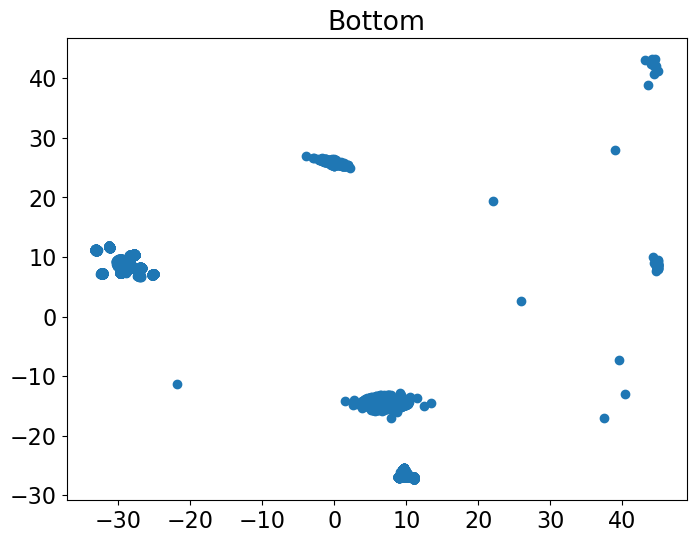

In [24]:
XB=bottomstars.X
YB=bottomstars.Y

CB=np.array(list(zip(bottomstars.X,bottomstars.Y)))
plt.scatter(CB[:,0], CB[:,1])
plt.title('Bottom')

In [25]:
from sklearn.cluster import KMeans
import math

In [26]:
kmeans=KMeans(n_clusters=12)
kmeans.fit(CB)

KMeans(n_clusters=12)

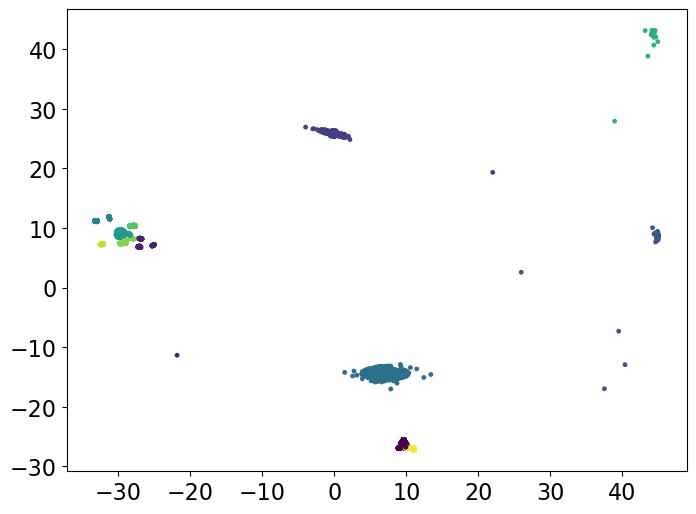

In [27]:
plt.scatter(CB[:,0], CB[:,1],s=6, c=kmeans.labels_)

In [28]:
xb = kmeans.cluster_centers_ # This

In [29]:
kmeans.labels_

array([6, 6, 6, ..., 3, 2, 3], dtype=int32)

In [30]:
xb

array([[  9.53636351, -26.30212938],
       [-26.36139981,   7.34040429],
       [ -0.15756652,  25.85765781],
       [ 44.06981429,   7.247     ],
       [  6.94965162, -14.34628868],
       [-32.22428114,  11.44455232],
       [-29.27824537,   8.97353754],
       [ 43.79152308,  40.96985385],
       [-28.04827114,  10.35658308],
       [-28.93937056,   7.77322801],
       [-32.27437828,   7.28564368],
       [ 10.52734124, -26.93645849]])

In [31]:
#Top
ddir = '/Users/chloe/Downloads/universe_2/'
topstars = pd.read_csv(ddir+'Top/Star_Data.csv') 

Text(0.5, 1.0, 'Top')

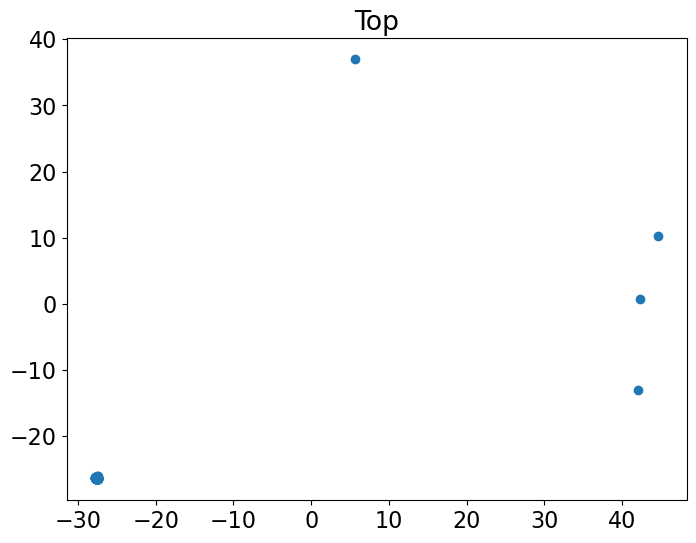

In [32]:
XT=topstars.X
YT=topstars.Y

CT=np.array(list(zip(topstars.X,topstars.Y)))
plt.scatter(CT[:,0], CT[:,1]) #centre of this one is (-27.7,-26.5)
centre=(-27.7,-26.5)
plt.title("Top")

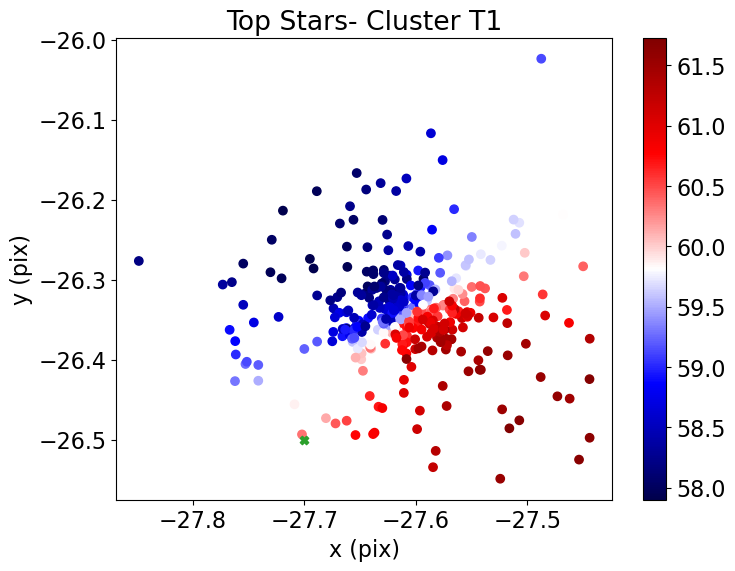

In [33]:
d = np.sqrt((topstars.X-centre[0])** 2 + (topstars.Y - centre[1])**2)
galaxyt1 = topstars[d<1] # filter to only close ones
plt.scatter(galaxyt1.X,galaxyt1.Y,c=galaxyt1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster T1');

19952.62314968879

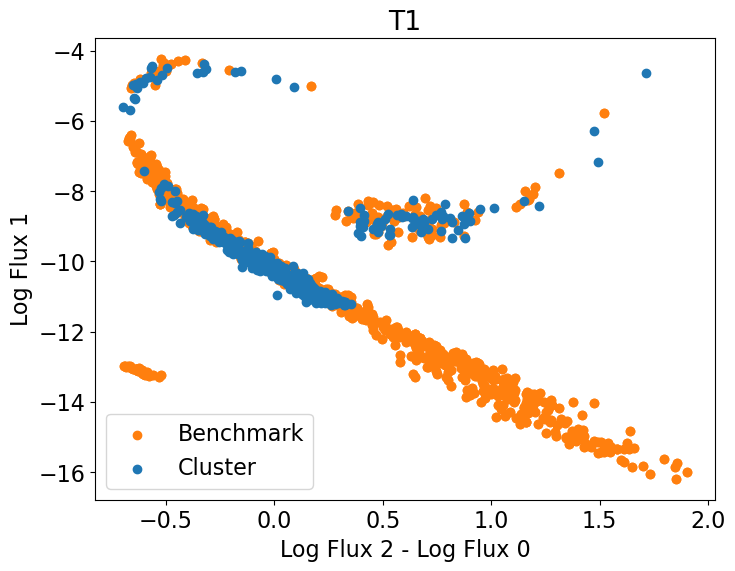

In [34]:
m0, m1, m2 = (np.log10(galaxyt1['BlueF']), 
              np.log10(galaxyt1['GreenF']), 
              np.log10(galaxyt1['RedF'])) 
colour = m2-m0

#st1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])


plt.title('T1')
10**(8.6/2)

In [35]:
#vargalaxy = galaxyt1[galaxyt1['Variable?']==1] THIS searches through a defined galaxy and pulls all variable stars
#print(vargalaxy) prints all variables in galaxy
# galaxyt1.iloc[[24]] #select one star and print its information

In [36]:
#Right
ddir = '/Users/chloe/Downloads/universe_2/'
rightstars = pd.read_csv(ddir+'Right/Star_Data.csv') 

Text(0.5, 1.0, 'Right')

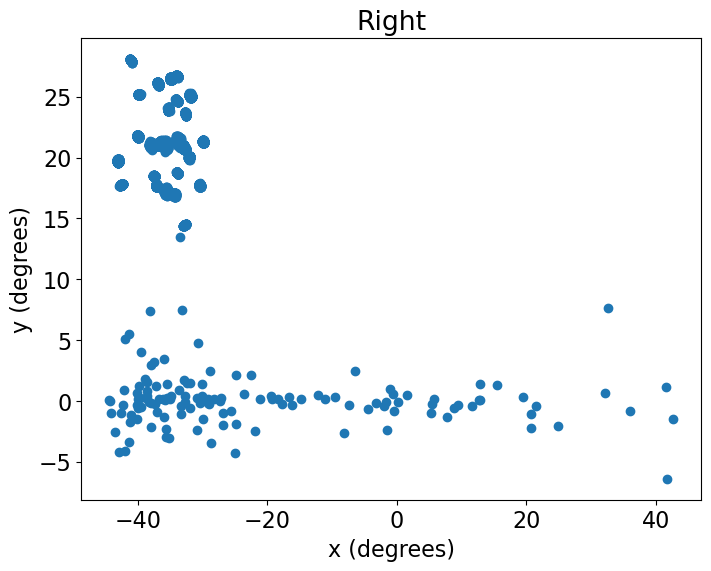

In [37]:
XR=rightstars.X
YR=rightstars.Y

CR=np.array(list(zip(rightstars.X,rightstars.Y)))
plt.scatter(CR[:,0], CR[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Right')

array([[-29.93993916,  21.30469491],
       [-36.67475787,  21.0755905 ],
       [-36.89233287,  26.06034188],
       [-34.64141524,  17.70572898],
       [  1.462232  ,  -0.191668  ],
       [-42.56652526,  17.75448185],
       [-38.12126207,   0.21407931],
       [-32.16457647,  24.54065275],
       [ 29.11008333,  -0.27631667],
       [-33.00350538,  20.80898244],
       [-30.46265895,  17.70673729],
       [-40.02721245,  21.75726285],
       [-41.07492727,  27.9616048 ],
       [-37.30176023,  18.05313744],
       [-34.43785384,  26.58364298],
       [-32.81452812,  14.43943056],
       [-25.09570857,  -0.1177    ],
       [-34.4441052 ,  24.45057324],
       [-43.07699318,  19.72556013],
       [-39.82382889,  25.18891709]])

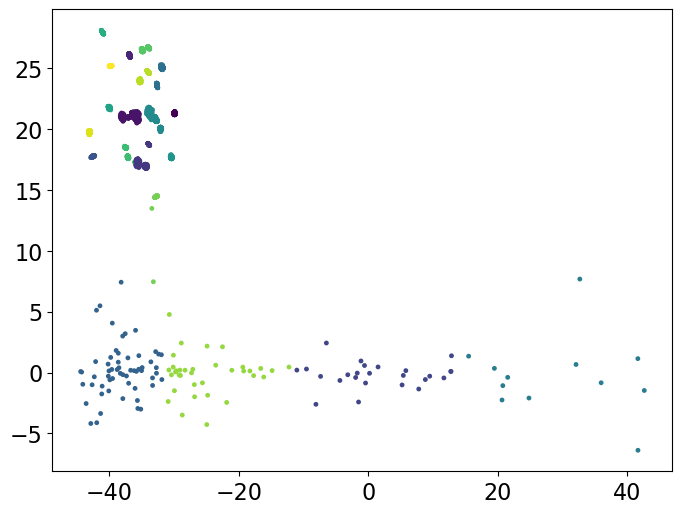

In [38]:
kmeans=KMeans(n_clusters=20)
kmeans.fit(CR)
plt.scatter(CR[:,0], CR[:,1],s=6, c=kmeans.labels_)
xr = kmeans.cluster_centers_
xr

Text(0.5, 1.0, 'Left')

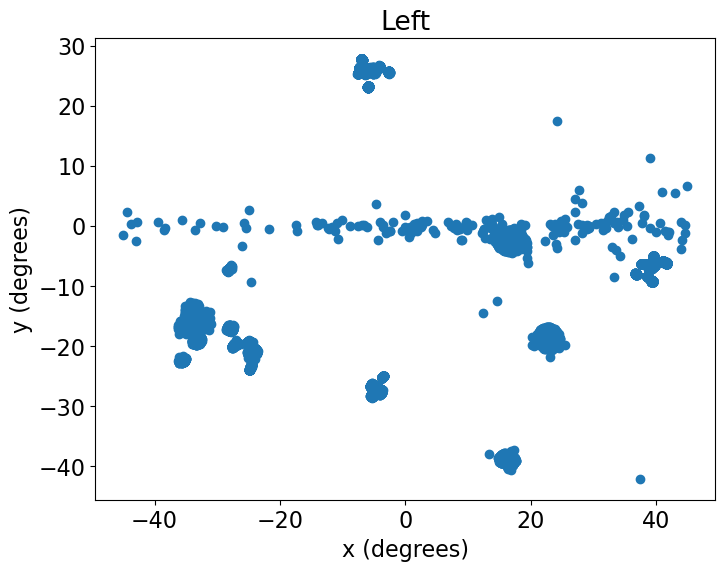

In [39]:
#Left
ddir = '/Users/chloe/Downloads/universe_2/'
leftstars = pd.read_csv(ddir+'Left/Star_Data.csv') 
XL=rightstars.X
YL=rightstars.Y

CL=np.array(list(zip(leftstars.X,leftstars.Y)))
plt.scatter(CL[:,0], CL[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Left')

array([[ 16.7737266 ,  -2.34774297],
       [-24.61571099, -21.18091404],
       [ -6.07136525,  25.81389625],
       [ 39.21870605,  -6.81238647],
       [ -4.66247907, -26.93237377],
       [-33.97471982, -15.32112215],
       [ 22.69950279, -18.69796356],
       [ 16.27581863, -38.88327001],
       [-28.19951622,  -6.89879392],
       [-27.61514928, -18.21681123],
       [-34.3453425 , -20.61102274],
       [ -4.07798095,  -0.12141905]])

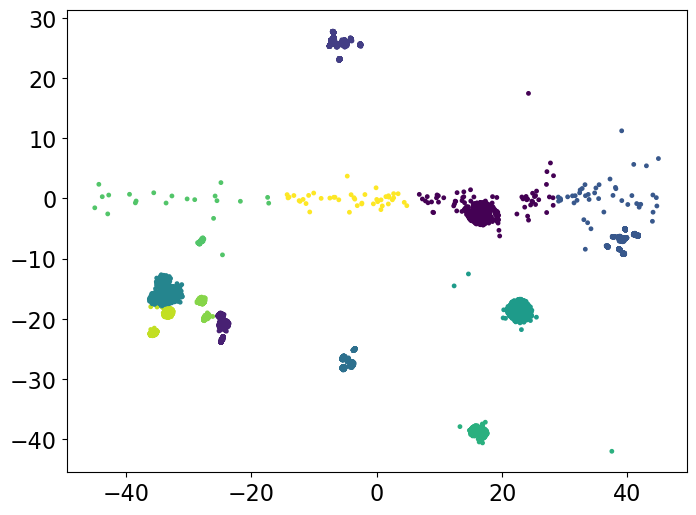

In [40]:
kmeans=KMeans(n_clusters=12)
kmeans.fit(CL)
plt.scatter(CL[:,0], CL[:,1],s=6, c=kmeans.labels_)
xl = kmeans.cluster_centers_
xl

Text(0.5, 1.0, 'Front')

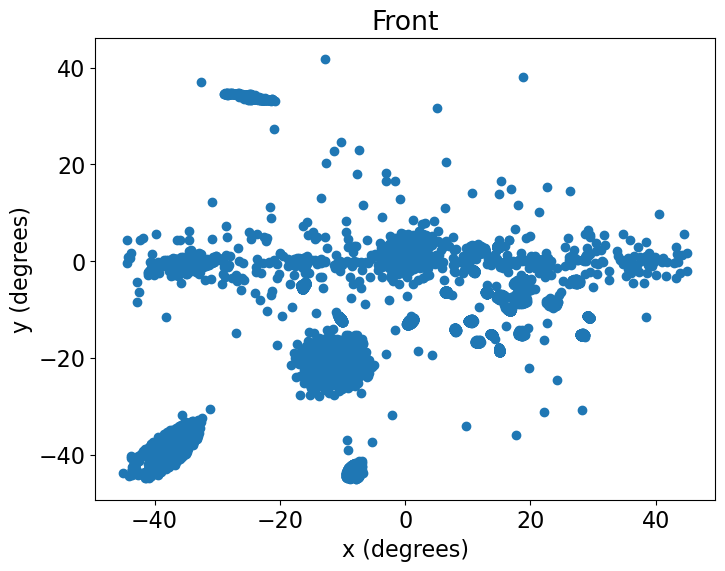

In [41]:
#Front
ddir = '/Users/chloe/Downloads/universe_2/'
frontstars = pd.read_csv(ddir+'Front/Star_Data.csv') 
XF=frontstars.X
YF=frontstars.Y

CF=np.array(list(zip(frontstars.X,frontstars.Y)))
plt.scatter(CF[:,0], CF[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Front')

array([[  7.0914185 , -11.45557159],
       [-10.94783942, -17.60958602],
       [-24.83723476,  33.87115245],
       [ 16.22709174,   0.49539002],
       [-37.88745448, -38.98062688],
       [ -8.17822995, -43.41380792],
       [-35.12068182,  -0.68912874],
       [ 14.83716412, -16.42589832],
       [ 27.40526587,  -9.87401371],
       [-16.31680692,  -4.97802112],
       [ 17.29151569,  -6.81251895],
       [  0.16062933,   2.11029051]])

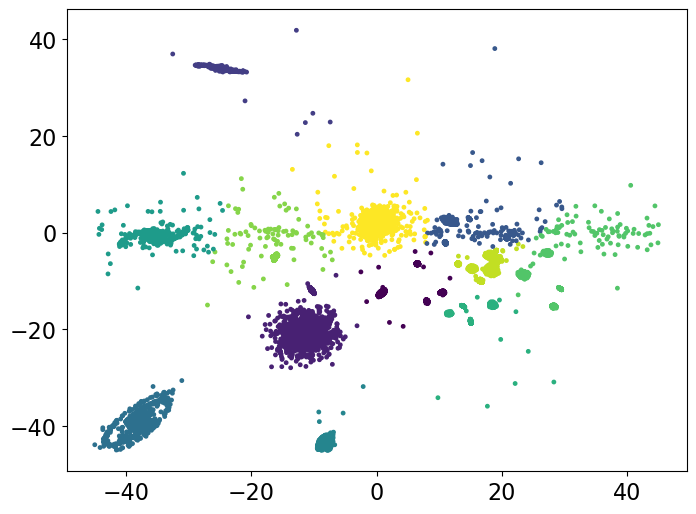

In [42]:
kmeans=KMeans(n_clusters=12)
kmeans.fit(CF)
plt.scatter(CF[:,0], CF[:,1],s=6, c=kmeans.labels_)
xf = kmeans.cluster_centers_
xf

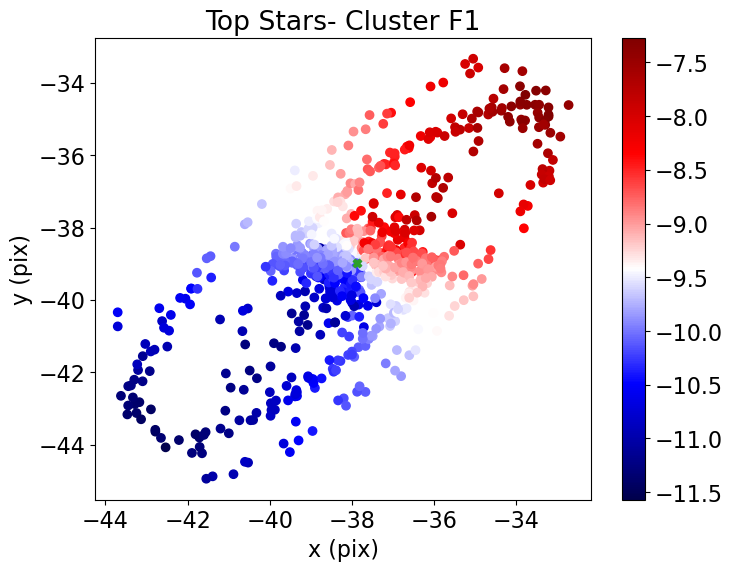

In [43]:
centre = (-37.88745448, -38.98062688)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf1 = frontstars[d<7] # filter to only close ones
plt.scatter(galaxyf1.X,galaxyf1.Y,c=galaxyf1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F1');

Text(0.5, 1.0, 'F1')

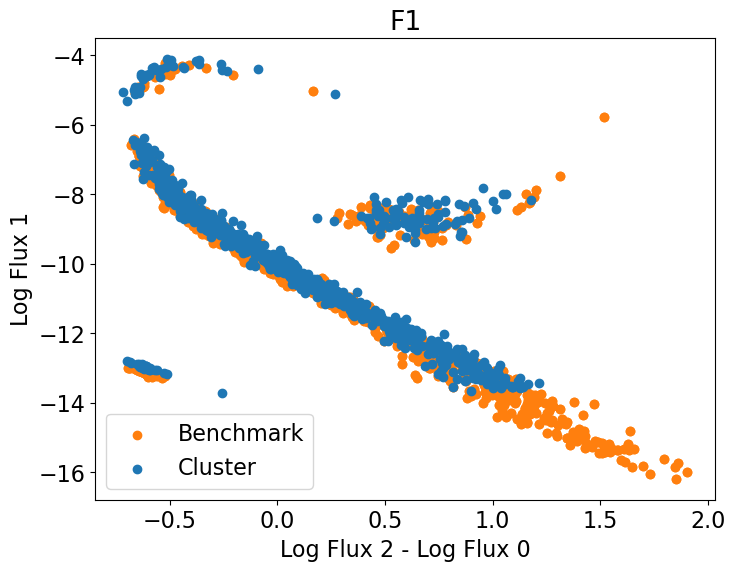

In [44]:
m0, m1, m2 = (np.log10(galaxyf1['BlueF']), 
              np.log10(galaxyf1['GreenF']), 
              np.log10(galaxyf1['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
10**(6/2)
plt.title('F1')

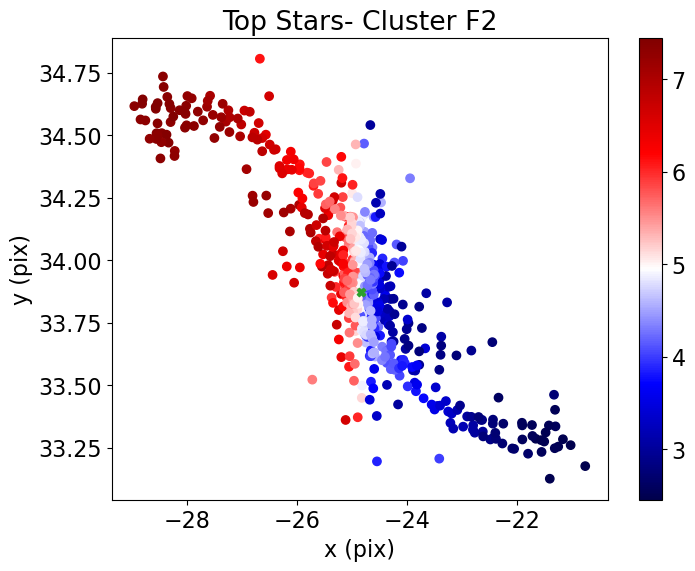

In [45]:
centre = (-24.83723476,  33.87115245)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf2 = frontstars[d<7] # filter to only close ones
plt.scatter(galaxyf2.X,galaxyf2.Y,c=galaxyf2.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F2');

Text(0.5, 1.0, 'F2')

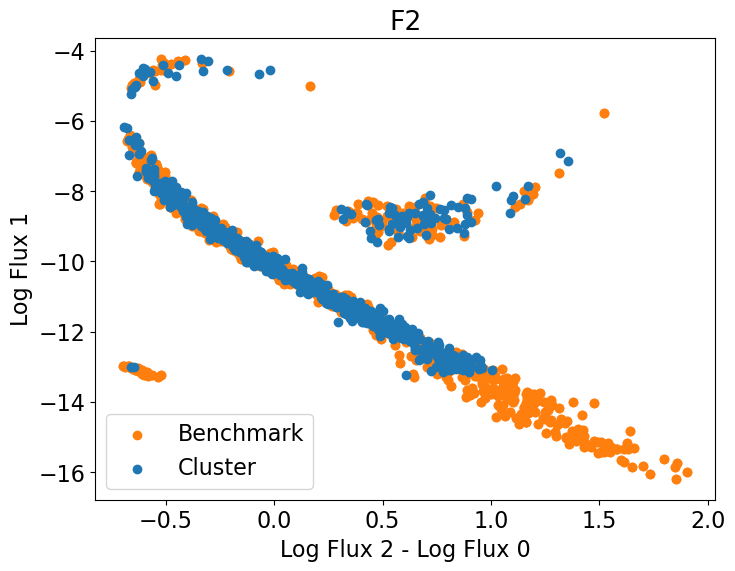

In [46]:
m0, m1, m2 = (np.log10(galaxyf2['BlueF']), 
              np.log10(galaxyf2['GreenF']), 
              np.log10(galaxyf2['RedF'])) 
colour = m2-m0

#sf2 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+6.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
10**(6.5/2)
plt.title("F2")

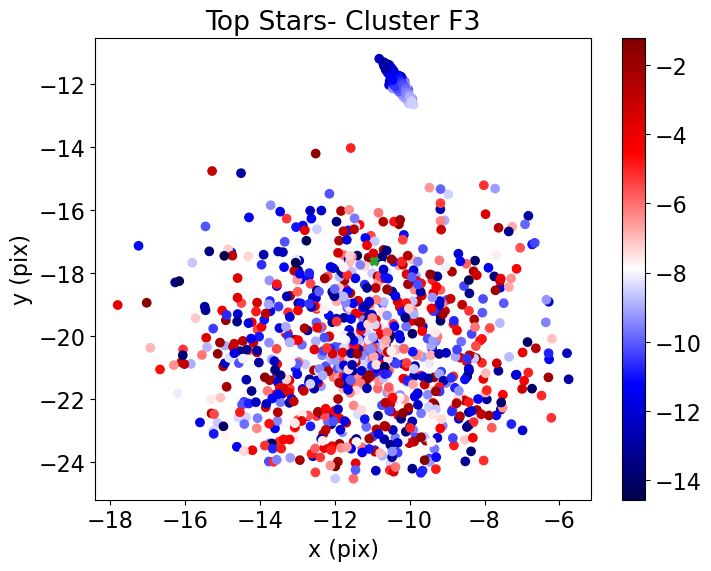

In [47]:
centre = (-10.94783942, -17.60958602)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf3 = frontstars[d<7] # filter to only close ones
plt.scatter(galaxyf3.X,galaxyf3.Y,c=galaxyf3.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F3');

3162.2776601683795

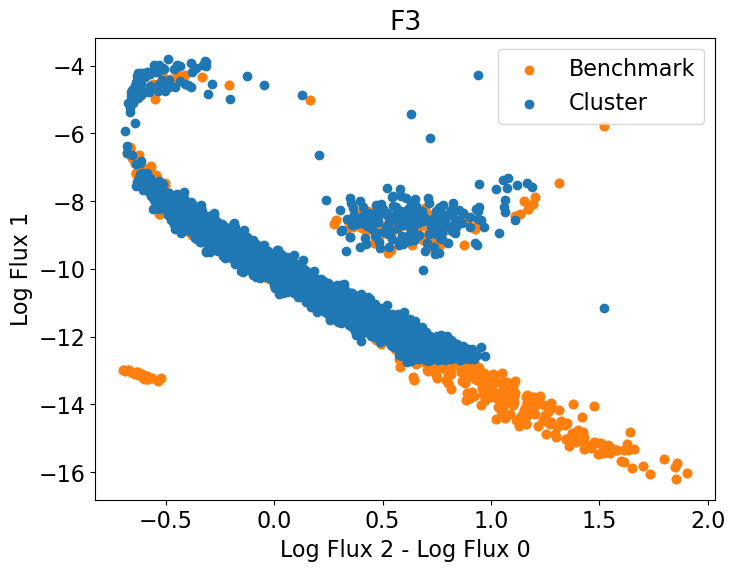

In [48]:
m0, m1, m2 = (np.log10(galaxyf3['BlueF']), 
              np.log10(galaxyf3['GreenF']), 
              np.log10(galaxyf3['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title("F3")
10**(7/2)

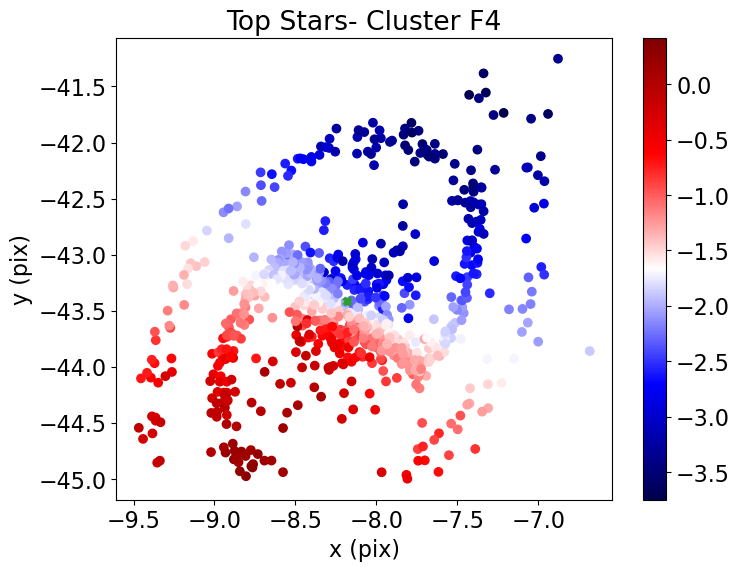

In [49]:
centre = (-8.17822995, -43.41380792)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf4 = frontstars[d<4] # filter to only close ones
plt.scatter(galaxyf4.X,galaxyf4.Y,c=galaxyf4.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F4');

3162.2776601683795

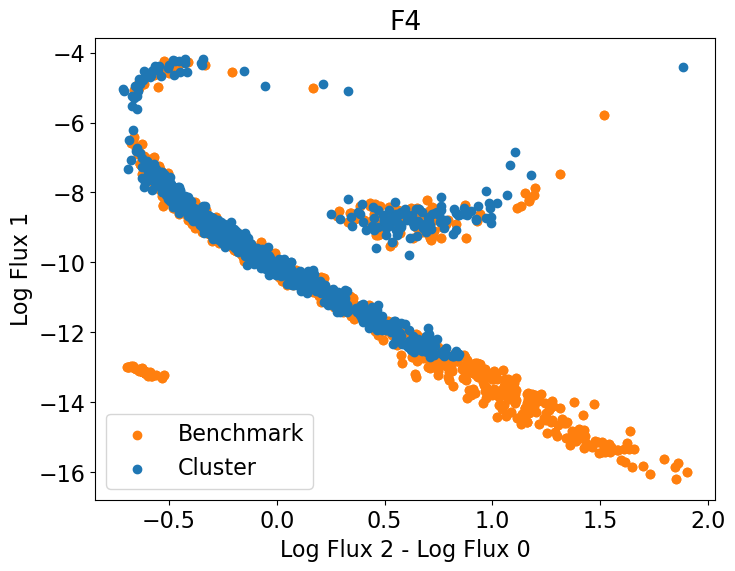

In [50]:
m0, m1, m2 = (np.log10(galaxyf4['BlueF']), 
              np.log10(galaxyf4['GreenF']), 
              np.log10(galaxyf4['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('F4')
10**(7/2)

Name       X       Y         BlueF        GreenF          RedF  \
21606  FrontS167359  0.2113  2.1105  1.408000e-15  3.514000e-15  1.743000e-14   
21607  FrontS167360  0.0303  2.2054  2.935000e-16  2.644000e-16  1.503000e-16   
21608  FrontS167361  0.3502  2.1316  1.257000e-17  1.509000e-17  1.627000e-17   
21609  FrontS167362  0.3639  2.2178  1.203000e-15  1.001000e-15  4.829000e-16   
21610  FrontS167365  0.4491  2.5160  2.205000e-18  3.077000e-18  4.203000e-18   
...             ...     ...     ...           ...           ...           ...   
23004  FrontS169464 -3.8571 -0.0626  3.639000e-14  3.986000e-14  3.498000e-14   
23005  FrontS169465 -4.3058 -0.8335  1.000000e-08  7.578000e-09  3.050000e-09   
23006  FrontS169467 -5.3762  1.2290  4.239000e-13  3.746000e-13  2.137000e-13   
23007  FrontS169468 -6.3210 -0.1380  3.024000e-15  3.760000e-15  4.255000e-15   
23032  FrontS169552 -3.3415 -0.1524  4.409000e-14  4.417000e-14  3.238000e-14   

       Parallax  RadialVelocity  Variable?  
21606     0.000            2.63          1  
21607     0.000            4.00          0  
21608     0.001            4.20          0  
21609     0.001            4.58          0  
21610     0.001            4.75          0  
...         ...             ...        ...  
23004     0.015           -0.27          0  
23005     0.014           -0.29          0  
23006     0.015           -0.37          0  
23007     0.014           -0.42          0  
23032     0.011           -0.21          0  

[1000 rows x 9 columns]

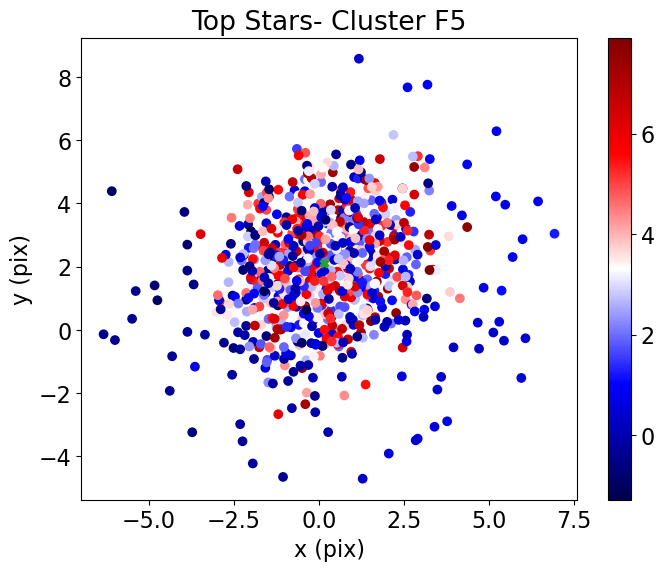

In [51]:
centre = (0.16062933,   2.11029051)
d = np.sqrt((frontstars.X-centre[0])** 2 + (frontstars.Y - centre[1])**2)
galaxyf5 = frontstars[d<7] # filter to only close ones
plt.scatter(galaxyf5.X,galaxyf5.Y,c=galaxyf5.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('Top Stars- Cluster F5');
galaxyf5

1778.2794100389228

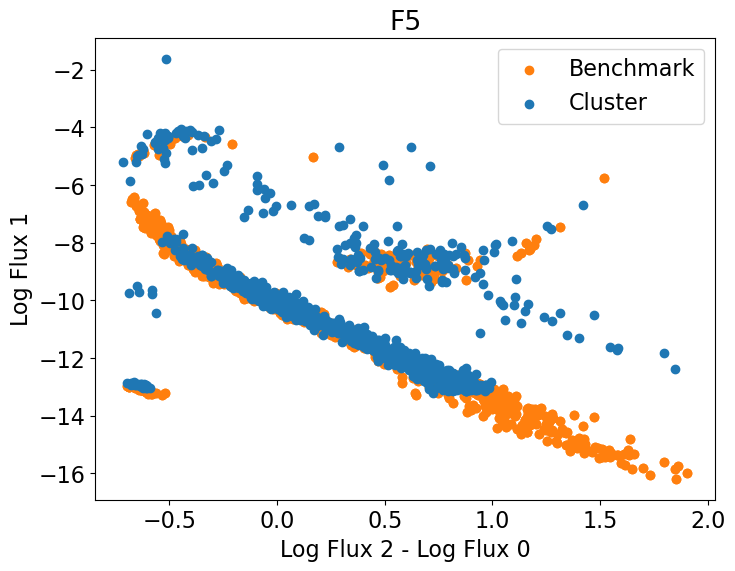

In [52]:
m0, m1, m2 = (np.log10(galaxyf5['BlueF']), 
              np.log10(galaxyf5['GreenF']), 
              np.log10(galaxyf5['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+6.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('F5')
10**(6.5/2)

Text(0.5, 1.0, 'Back')

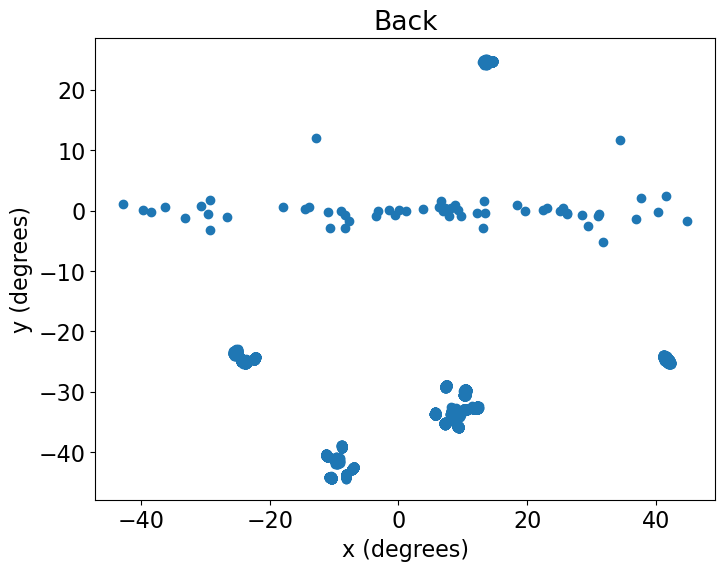

In [53]:
#Back
## Haven't got to it yet but i have clustered the stars in this galaxy and will find all the distances soon
## I've done this and the top image so if its cool im gonna leave the other views to you guys
ddir = '/Users/chloe/Downloads/universe_2/'
backstars = pd.read_csv(ddir+'Back/Star_Data.csv') 
#XBA=backstars.X[backstars.Y<-10&backstars.Y>19]
XBA=backstars.X
YBA=backstars.Y

CBA=np.array(list(zip(backstars.X,backstars.Y)))
plt.scatter(CBA[:,0], CBA[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Back')

(13645,) (13645,)


Text(0.5, 1.0, 'Back-Reduced')

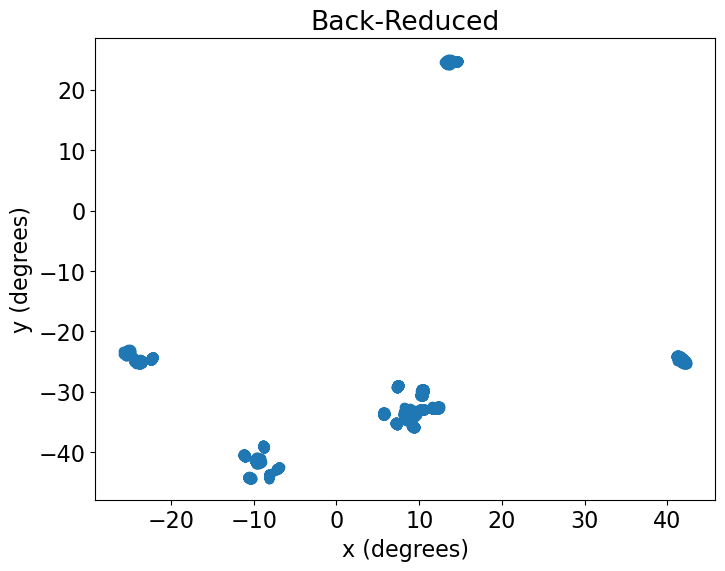

In [54]:
XBA=backstars.X[(backstars.Y<-10)|(backstars.Y>19)]
YBA=backstars.Y[(backstars.Y<-10)|(backstars.Y>19)]
# XBA=backstars.X[(backstars.Y>19)]
# YBA=backstars.Y[(backstars.Y>19)]
print(np.shape(YBA), np.shape(XBA))
CBA=np.array(list(zip(XBA,YBA)))
plt.scatter(CBA[:,0], CBA[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Back-Reduced')

array([[ -7.08522101, -42.68815294],
       [ 13.56565183,  24.58746981],
       [ 41.65401492, -24.66319513],
       [ 11.69323639, -32.71761962],
       [-23.7411227 , -25.02280837],
       [  5.71196328, -33.68406677],
       [-10.51791533, -44.26506245],
       [  7.38684234, -29.09425255],
       [ -8.79838502, -39.13926435],
       [  9.26548462, -35.81633573],
       [ 10.42071839, -29.80672286],
       [-11.13208013, -40.58794292],
       [  8.76339623, -33.63173543],
       [  7.23939239, -35.28150299],
       [-22.32923073, -24.51114134],
       [-25.29921244, -23.51684139],
       [ -9.51475882, -41.44602602],
       [ 10.37419578, -32.92942329],
       [ -8.14270442, -43.96367691],
       [ 10.28218743, -30.58019354],
       [ 14.52497384,  24.71534616],
       [ 12.25934408, -32.65742111],
       [-24.42321423, -24.76371036]])

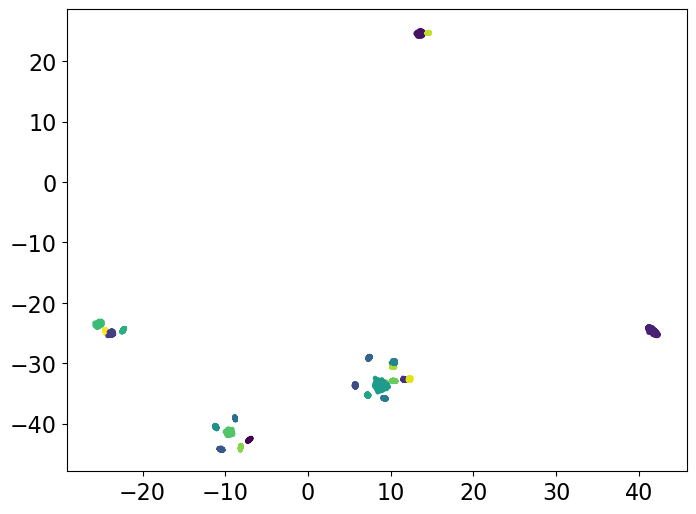

In [55]:
kmeans=KMeans(n_clusters=23)
kmeans.fit(CBA)
plt.scatter(CBA[:,0], CBA[:,1],s=6, c=kmeans.labels_)
xba = kmeans.cluster_centers_
xba

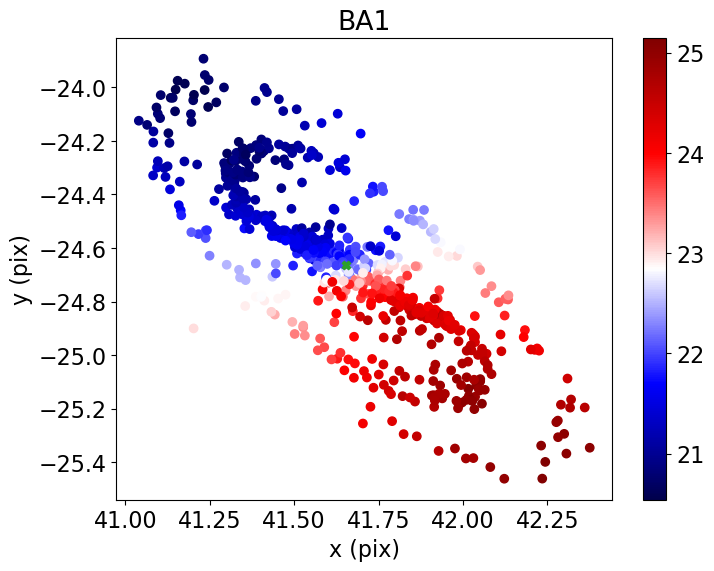

In [56]:
centre = (41.65401492, -24.66319513)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba1 = backstars[d<7] # filter to only close ones
plt.scatter(galaxyba1.X,galaxyba1.Y,c=galaxyba1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA1');


8912.509381337459

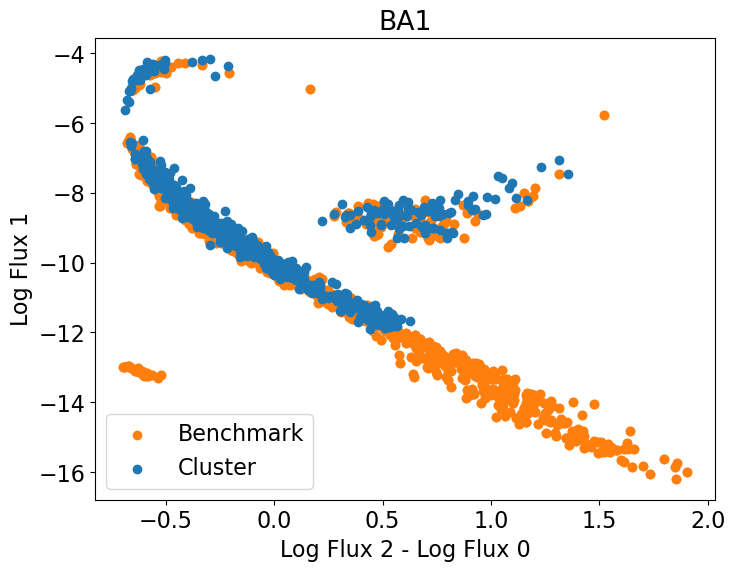

In [57]:
m0, m1, m2 = (np.log10(galaxyba1['BlueF']), 
              np.log10(galaxyba1['GreenF']), 
              np.log10(galaxyba1['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+7.9,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA1')
10**(7.9/2)



In [58]:
#galaxyba1

In [59]:
vargalaxyba1=galaxyba1[galaxyba1['Variable?']==1]
print(np.shape(vargalaxyba1))
print(vargalaxyba1)
print(bytes('BackS141889','utf-8'))
print()

(54, 9)
              Name        X        Y         BlueF        GreenF  \
11691  BackS141889  41.7002 -24.6798  8.289000e-13  6.917000e-13   
11749  BackS142010  41.7346 -24.7190  3.412000e-17  8.825000e-17   
11825  BackS142145  41.6407 -24.5254  1.567000e-16  3.795000e-16   
11845  BackS142177  41.7519 -24.7701  2.488000e-16  6.973000e-16   
11850  BackS142186  41.5726 -24.6223  8.640000e-13  6.550000e-13   
11866  BackS142212  41.8044 -24.9403  1.365000e-16  1.052000e-16   
11895  BackS142259  41.5650 -24.6386  5.837000e-13  4.439000e-13   
11906  BackS142271  41.8149 -24.8703  5.673000e-17  1.178000e-16   
11920  BackS142288  41.5021 -24.5967  9.098000e-13  7.900000e-13   
11941  BackS142314  41.8414 -24.8306  2.032000e-16  1.578000e-16   
11948  BackS142323  41.5326 -24.5946  1.886000e-16  1.453000e-16   
11949  BackS142324  41.5977 -24.6592  3.224000e-17  7.095000e-17   
11951  BackS142327  41.8626 -24.8259  1.286000e-16  9.745000e-17   
12030  BackS142454  41.4258 -24.5150  1.

In [60]:
variables

'/Users/chloe/Downloads/universe_2//Variable_Star_Data/'

In [61]:
m0, m1, m2 = np.log10(galaxyba1['BlueF']), np.log10(galaxyba1['GreenF']), np.log10(galaxyba1['RedF']) 
colour = m2-m0
abs_mag = m1 + 2*np.log10(1./galaxyba1.Parallax) 

v0, v1, v2 = np.log10(vargalaxyba1['BlueF']), np.log10(vargalaxyba1['GreenF']), np.log10(vargalaxyba1['RedF']) 
variable_colour = v2-v0
abs_mag_v = v1 + 2*np.log10(1./vargalaxyba1.Parallax)

Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

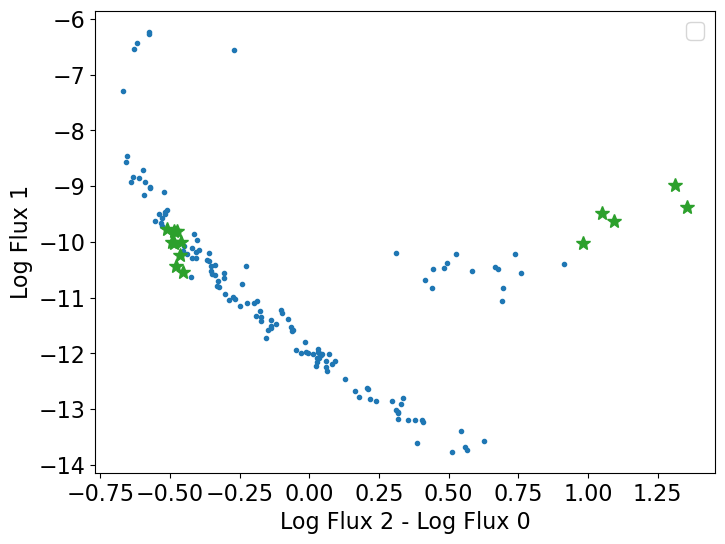

In [62]:
s = plt.plot(colour,abs_mag,'.C0')
h = plt.plot(variable_colour,abs_mag_v,'.C2',marker='*',markersize=10)

    
plt.legend([s, h],['Steady','Variable'])
plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

In [63]:
#plt.plot(vargalaxyba1.Period,abs_mag_v,'.',color='C2')
#plt.xlabel('Period (h)')
#plt.ylabel('Log Flux');

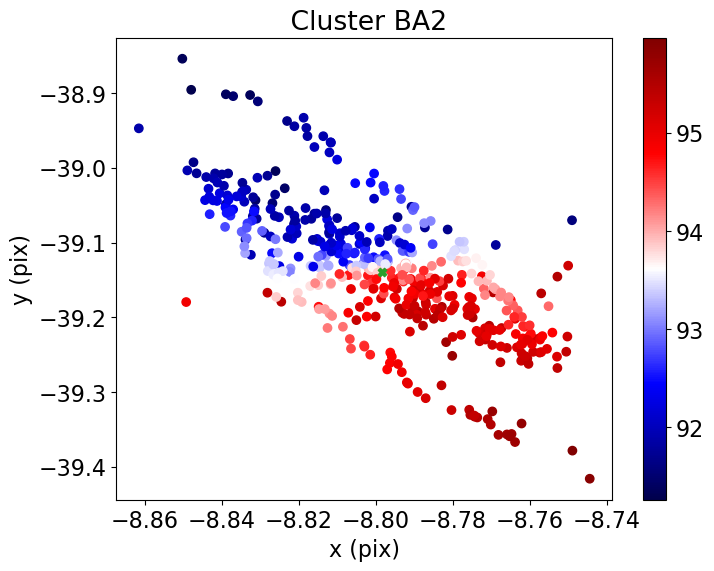

In [64]:
centre = (-8.79838502, -39.139264351)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba2 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba2.X,galaxyba2.Y,c=galaxyba2.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title(' Cluster BA2');


25118.864315095823

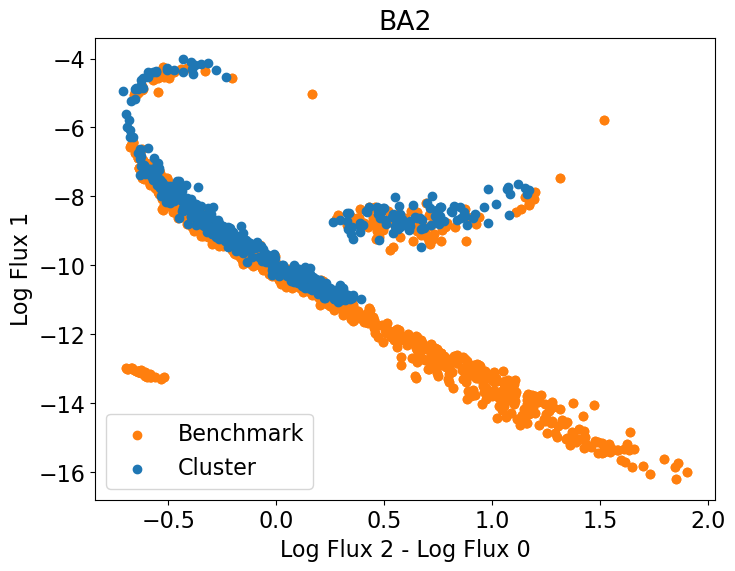

In [65]:
m0, m1, m2 = (np.log10(galaxyba2['BlueF']), 
              np.log10(galaxyba2['GreenF']), 
              np.log10(galaxyba2['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.8,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA2')
10**(8.8/2)

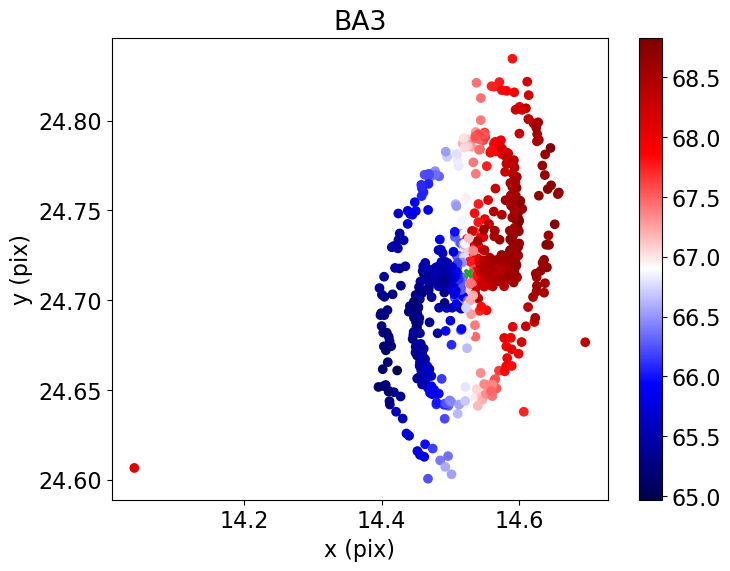

In [66]:
centre = (14.52497384,  24.71534616)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba3 = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba3.X,galaxyba3.Y,c=galaxyba3.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA3');


25118.864315095823

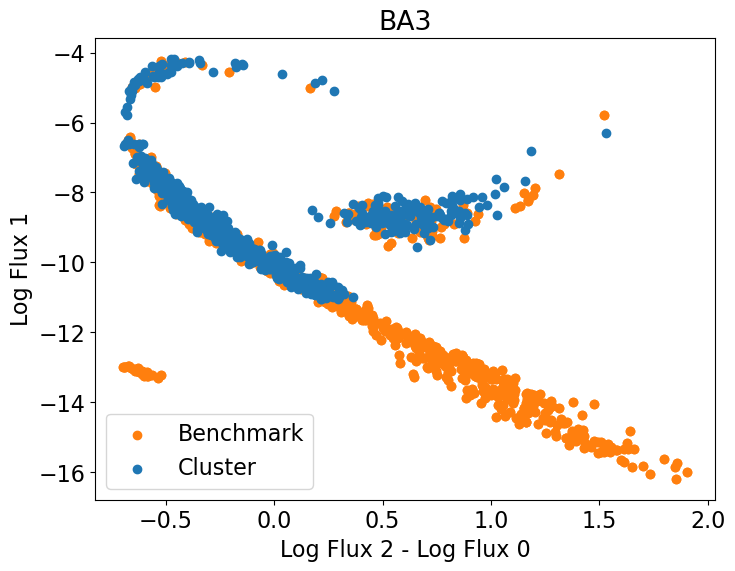

In [67]:
m0, m1, m2 = (np.log10(galaxyba3['BlueF']), 
              np.log10(galaxyba3['GreenF']), 
              np.log10(galaxyba3['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.8,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA3')
10**(8.8/2)

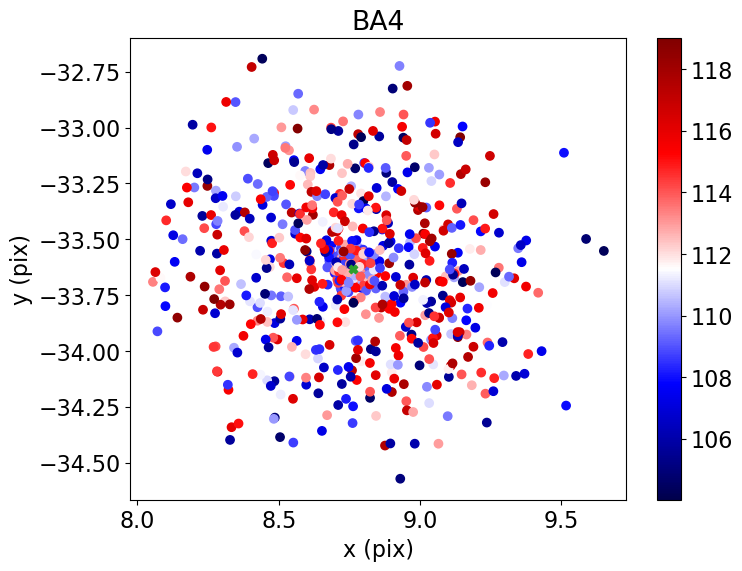

In [68]:
centre = (8.76339623, -33.63173543)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba4 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba4.X,galaxyba4.Y,c=galaxyba4.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA4');


22387.21138568338

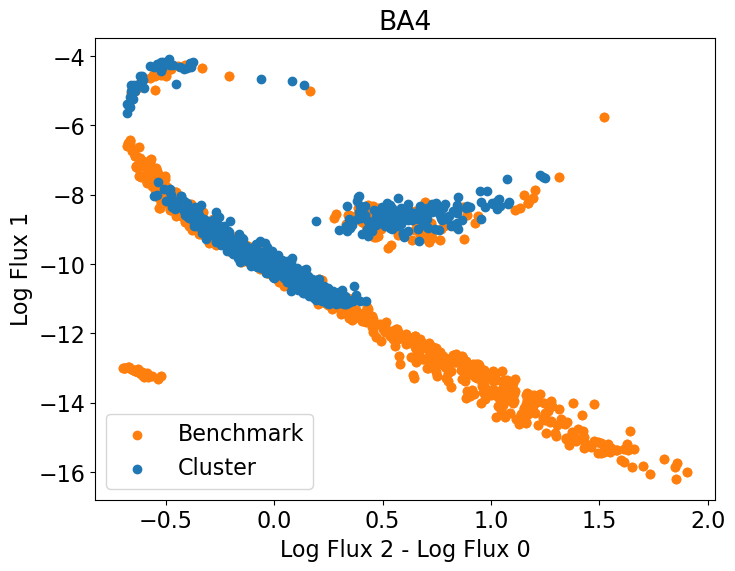

In [69]:
m0, m1, m2 = (np.log10(galaxyba4['BlueF']), 
              np.log10(galaxyba4['GreenF']), 
              np.log10(galaxyba4['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA4')
10**(8.7/2)

Text(0.5, 1.0, 'BA5a')

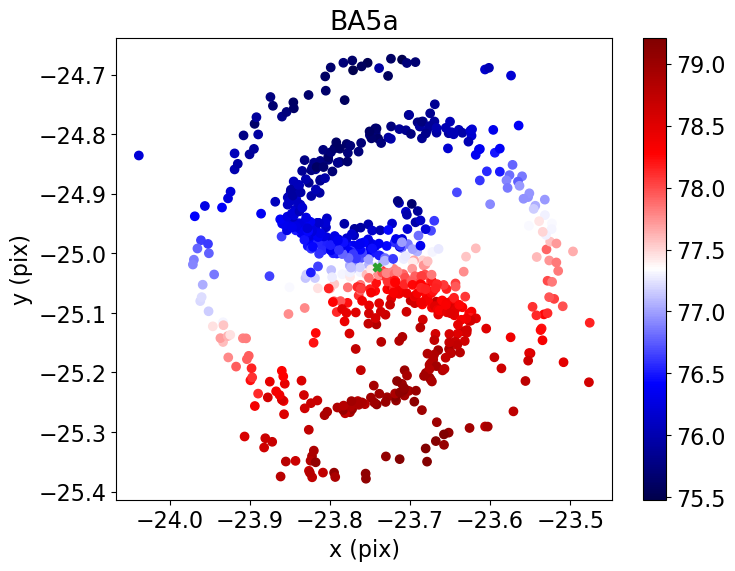

In [70]:
centre = (-23.7411227 , -25.02280837)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba5a = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba5a.X,galaxyba5a.Y,c=galaxyba5a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA5a')


11220.18454301963

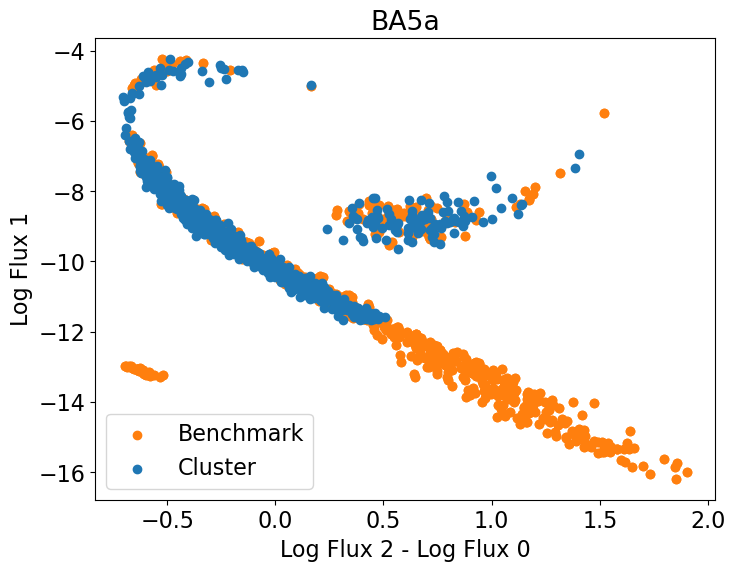

In [71]:
m0, m1, m2 = (np.log10(galaxyba5a['BlueF']), 
              np.log10(galaxyba5a['GreenF']), 
              np.log10(galaxyba5a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.1,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA5a')
10**(8.1/2)

Text(0.5, 1.0, 'BA5b')

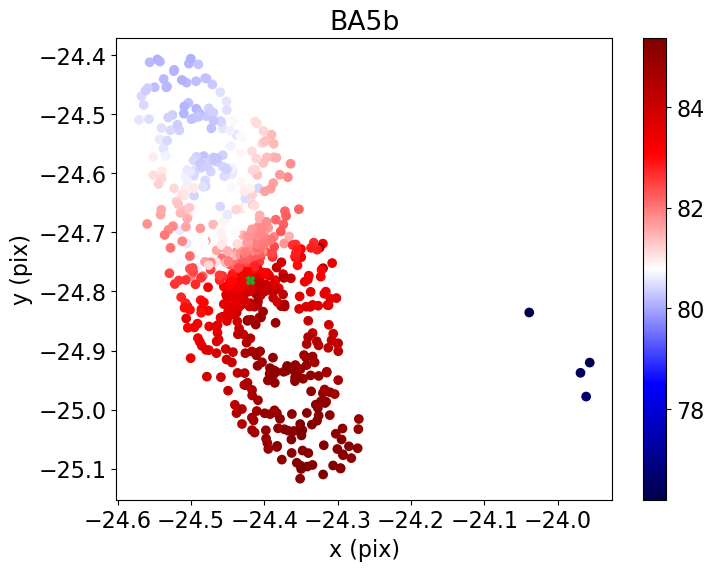

In [72]:
centre = (-24.42 , -24.78)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba5b = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba5b.X,galaxyba5b.Y,c=galaxyba5b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA5b')

12589.254117941662

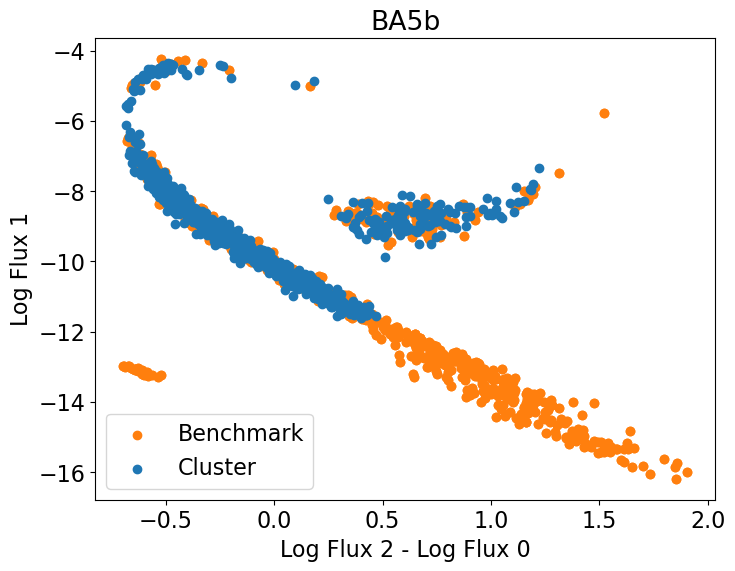

In [73]:
m0, m1, m2 = (np.log10(galaxyba5b['BlueF']), 
              np.log10(galaxyba5b['GreenF']), 
              np.log10(galaxyba5b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.2,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA5b')
10**(8.2/2)

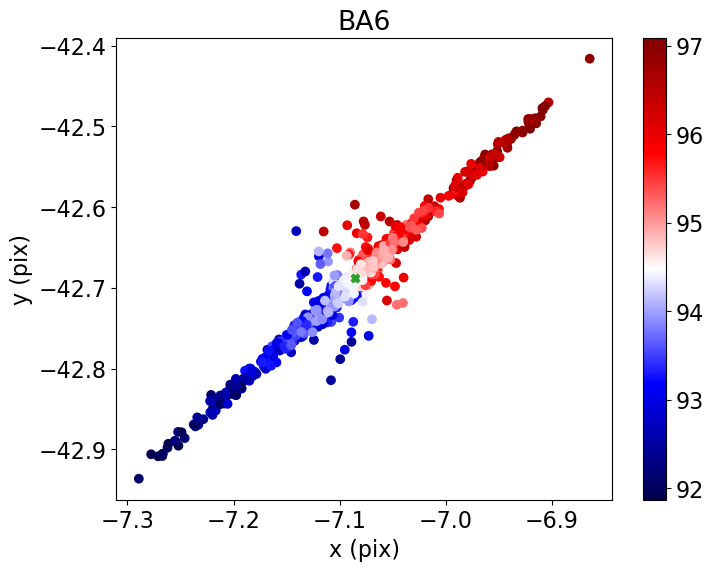

In [74]:
centre = (-7.08522101, -42.68815294)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba6 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba6.X,galaxyba6.Y,c=galaxyba6.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA6');


22387.21138568338

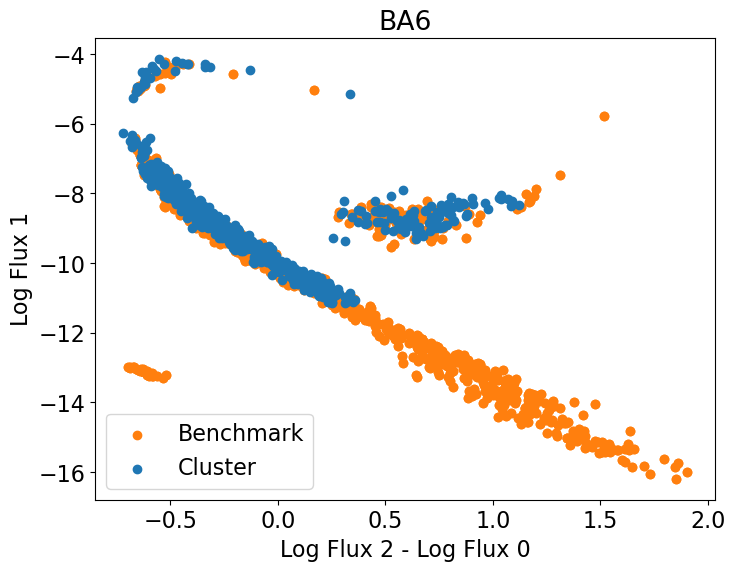

In [75]:
m0, m1, m2 = (np.log10(galaxyba6['BlueF']), 
              np.log10(galaxyba6['GreenF']), 
              np.log10(galaxyba6['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA6')
10**(8.7/2)

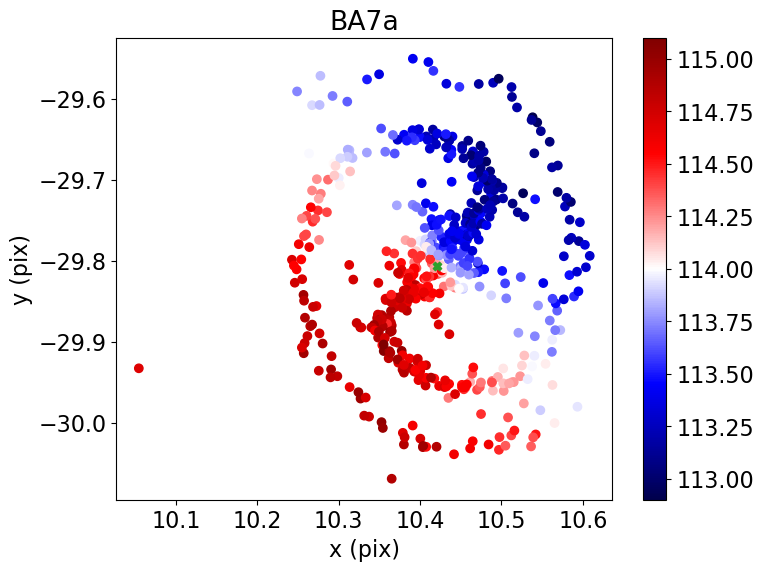

In [76]:
centre = (10.42071839, -29.80672286)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba7a = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba7a.X,galaxyba7a.Y,c=galaxyba7a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA7a');


19952.62314968879

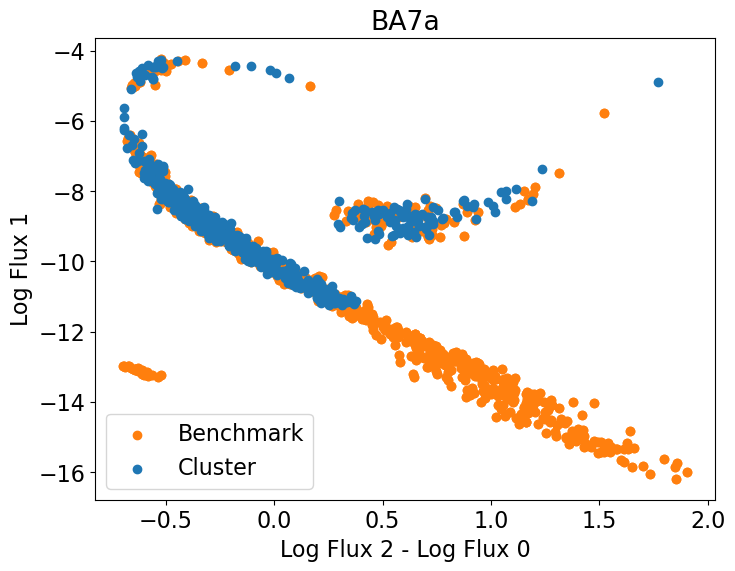

In [77]:
m0, m1, m2 = (np.log10(galaxyba7a['BlueF']), 
              np.log10(galaxyba7a['GreenF']), 
              np.log10(galaxyba7a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA7a')
10**(8.6/2)

Text(0.5, 1.0, 'BA7b')

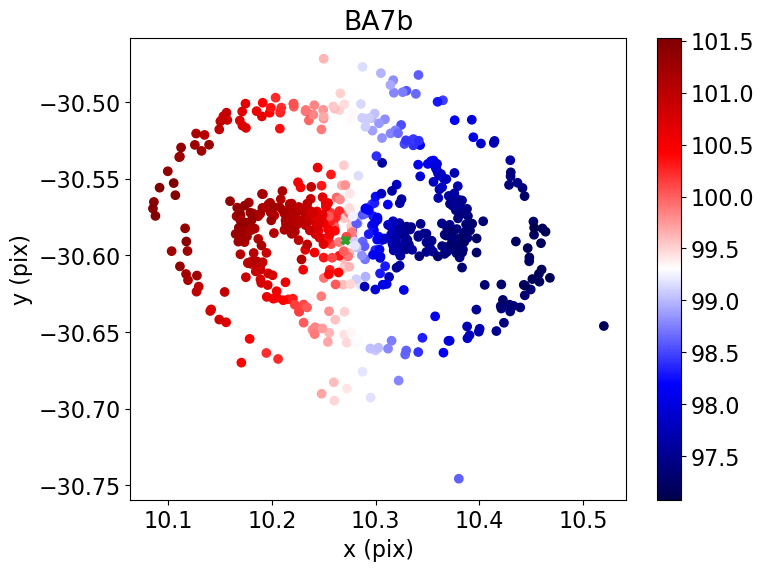

In [78]:
centre = (10.27 , -30.59)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba7b = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba7b.X,galaxyba7b.Y,c=galaxyba7b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA7b')

19952.62314968879

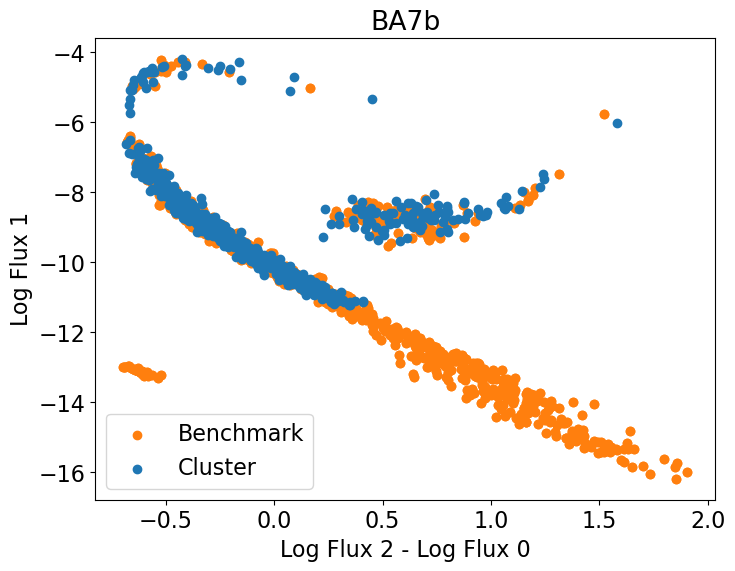

In [79]:
m0, m1, m2 = (np.log10(galaxyba7b['BlueF']), 
              np.log10(galaxyba7b['GreenF']), 
              np.log10(galaxyba7b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA7b')
10**(8.6/2)

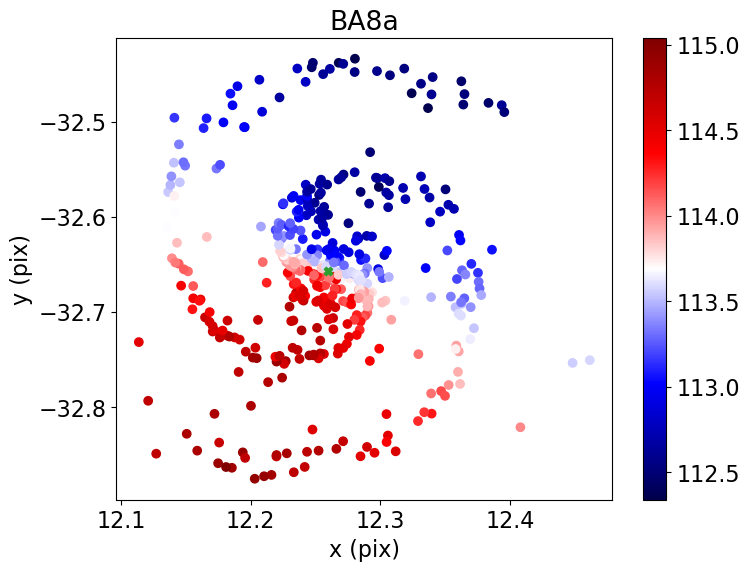

In [80]:
centre = (12.25934408, -32.65742111)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba8a = backstars[d<0.3] # filter to only close ones
plt.scatter(galaxyba8a.X,galaxyba8a.Y,c=galaxyba8a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA8a');


19952.62314968879

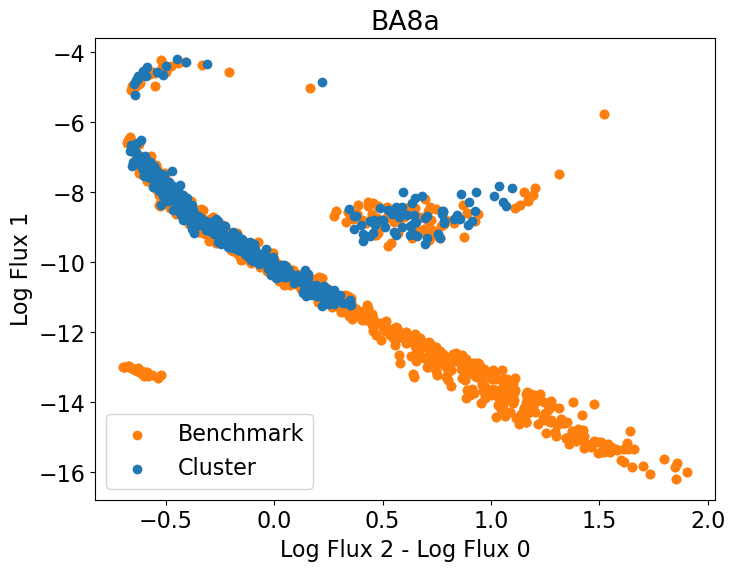

In [81]:
m0, m1, m2 = (np.log10(galaxyba8a['BlueF']), 
              np.log10(galaxyba8a['GreenF']), 
              np.log10(galaxyba8a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA8a')
10**(8.6/2)

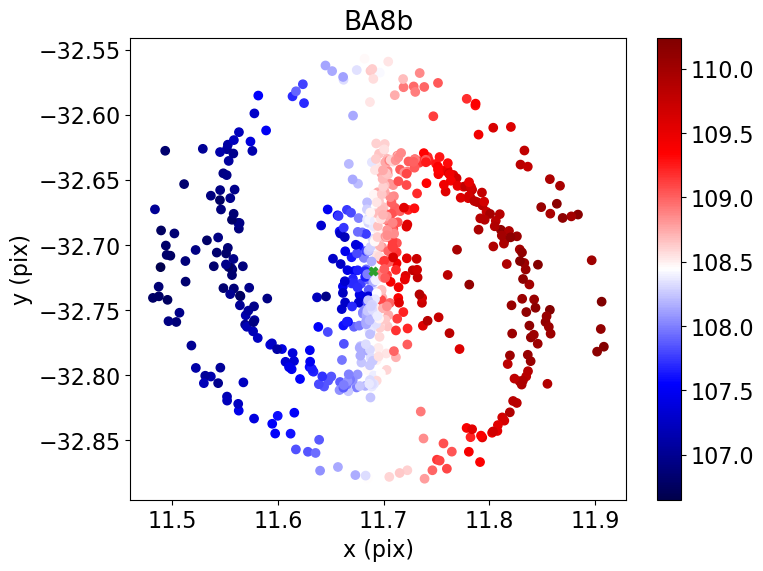

In [82]:
centre = (11.69, -32.72)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba8b = backstars[d<0.3] # filter to only close ones
plt.scatter(galaxyba8b.X,galaxyba8b.Y,c=galaxyba8b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA8b');

17782.794100389227

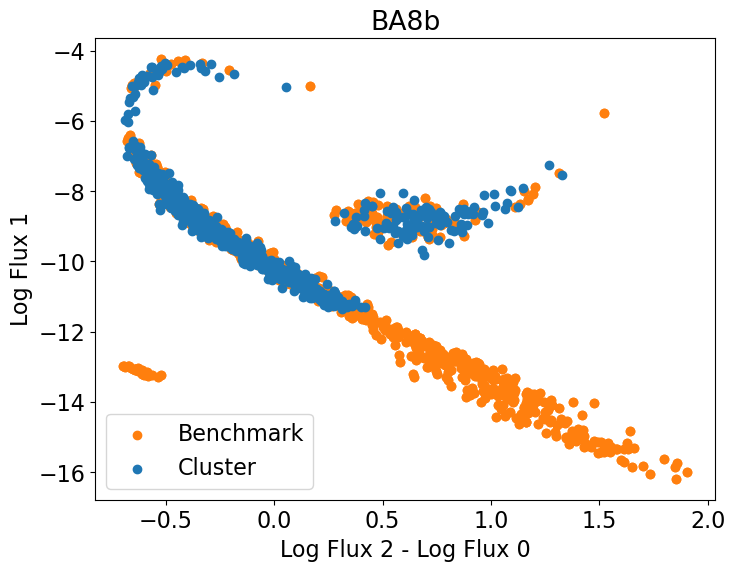

In [83]:
m0, m1, m2 = (np.log10(galaxyba8b['BlueF']), 
              np.log10(galaxyba8b['GreenF']), 
              np.log10(galaxyba8b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA8b')
10**(8.5/2)

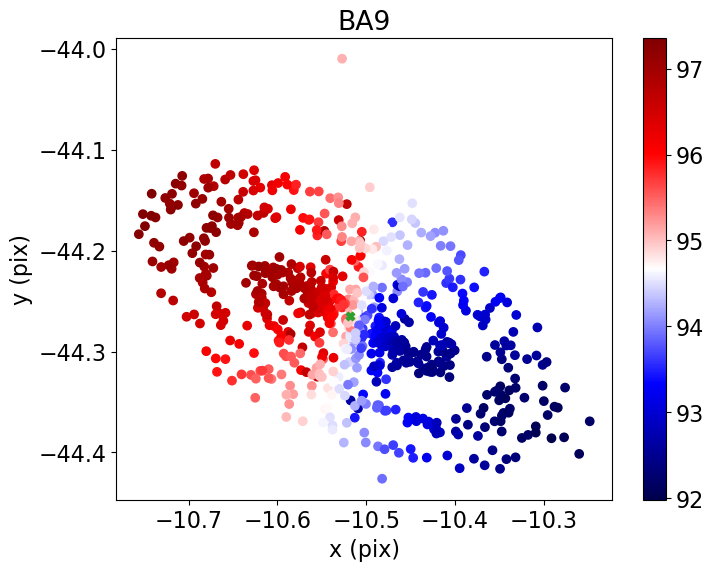

In [84]:
centre = (-10.51791533, -44.26506245)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba9 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba9.X,galaxyba9.Y,c=galaxyba9.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA9');


22387.21138568338

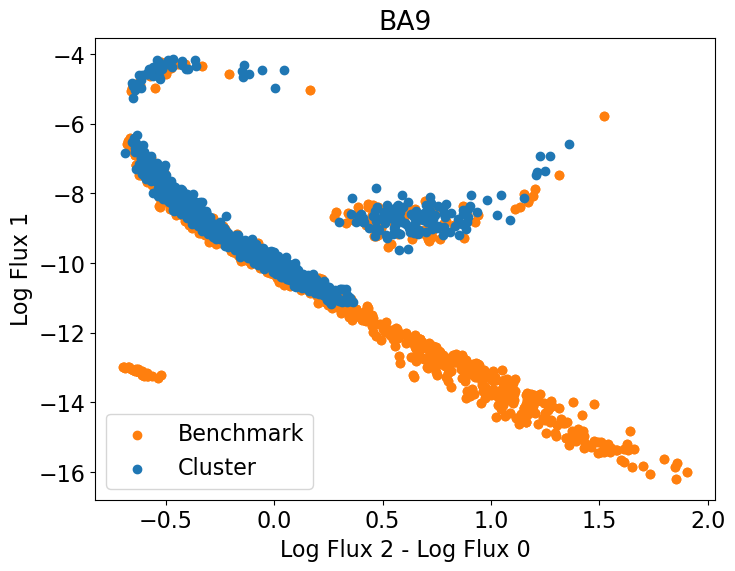

In [85]:
m0, m1, m2 = (np.log10(galaxyba9['BlueF']), 
              np.log10(galaxyba9['GreenF']), 
              np.log10(galaxyba9['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA9')
10**(8.7/2)

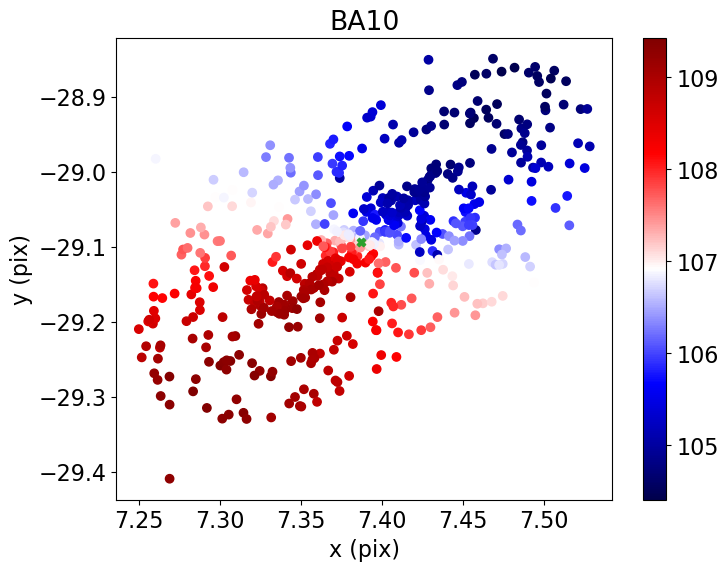

In [86]:
centre = (7.38684234, -29.09425255)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba10 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba10.X,galaxyba10.Y,c=galaxyba10.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA10');


Text(0.5, 1.0, 'BA10')

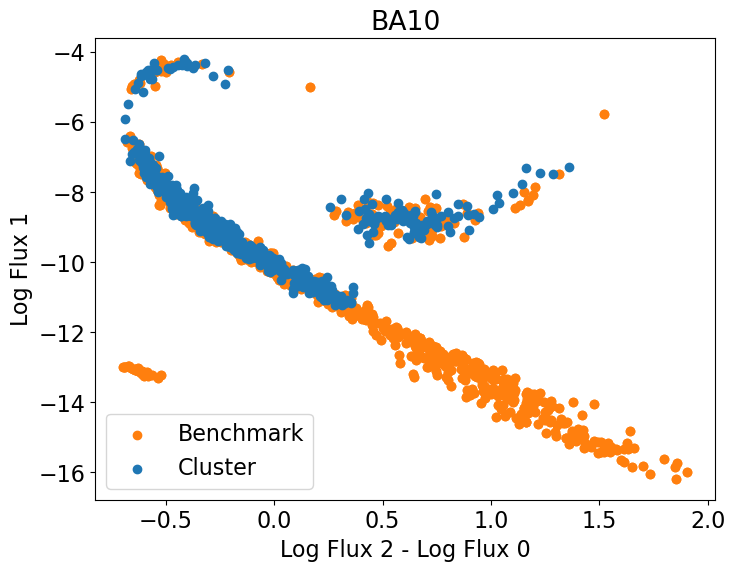

In [87]:
m0, m1, m2 = (np.log10(galaxyba10['BlueF']), 
              np.log10(galaxyba10['GreenF']), 
              np.log10(galaxyba10['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA10')

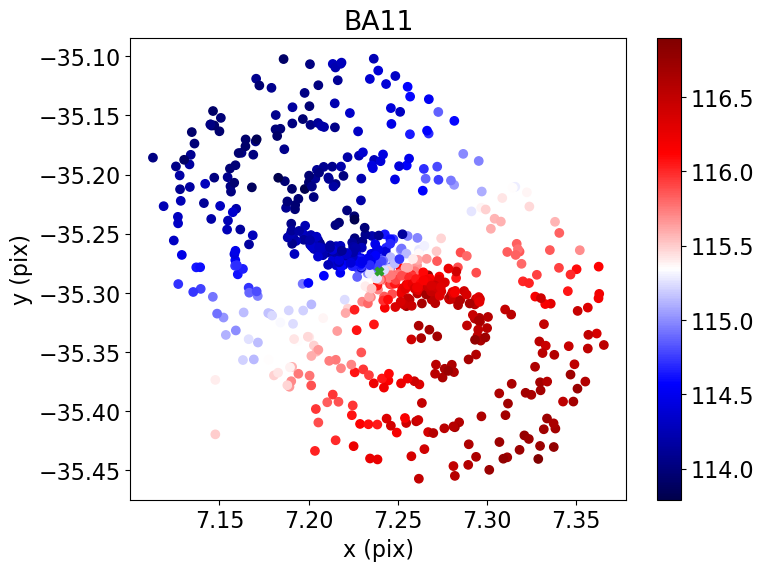

In [88]:
centre = (7.23939239, -35.28150299)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba11 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba11.X,galaxyba11.Y,c=galaxyba11.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA11');


Text(0.5, 1.0, 'BA11')

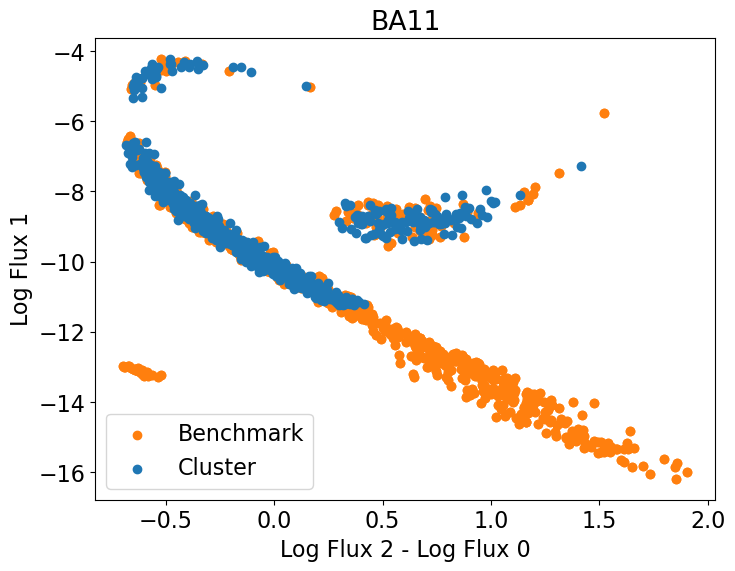

In [89]:
m0, m1, m2 = (np.log10(galaxyba11['BlueF']), 
              np.log10(galaxyba11['GreenF']), 
              np.log10(galaxyba11['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA11')

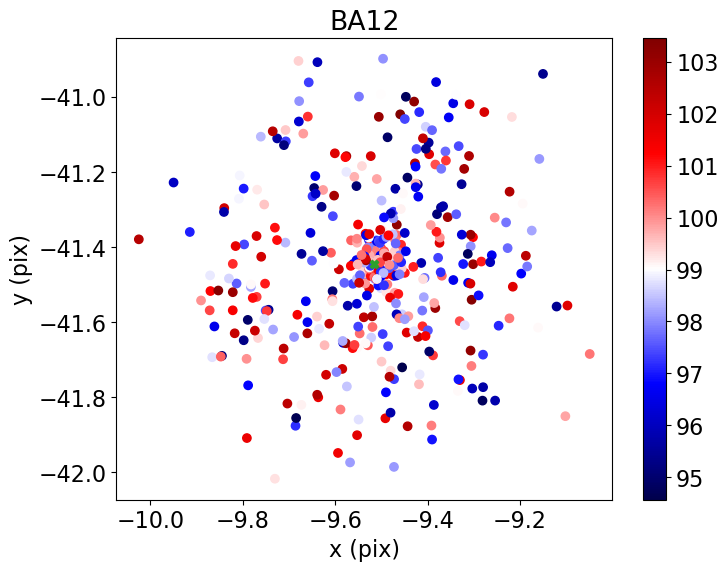

In [90]:
centre = (-9.51475882, -41.44602602)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba12 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba12.X,galaxyba12.Y,c=galaxyba12.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA12');


Text(0.5, 1.0, 'BA12')

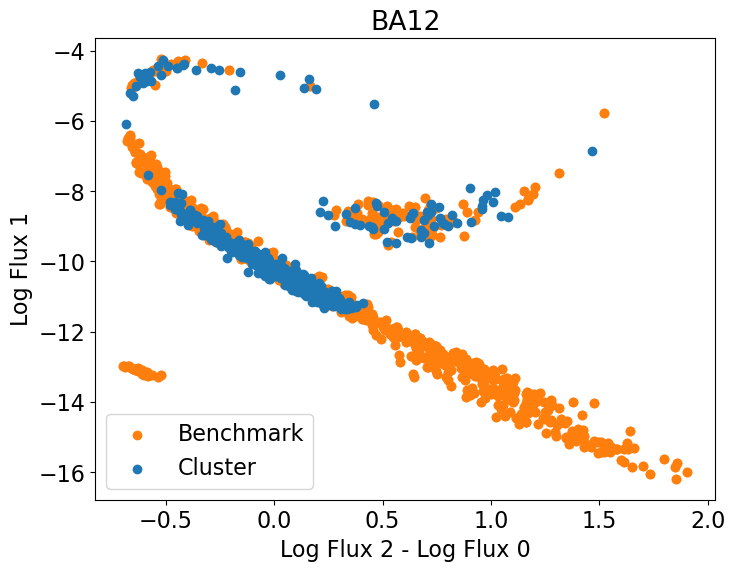

In [91]:
m0, m1, m2 = (np.log10(galaxyba12['BlueF']), 
              np.log10(galaxyba12['GreenF']), 
              np.log10(galaxyba12['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA12')

Text(0.5, 1.0, 'BA13')

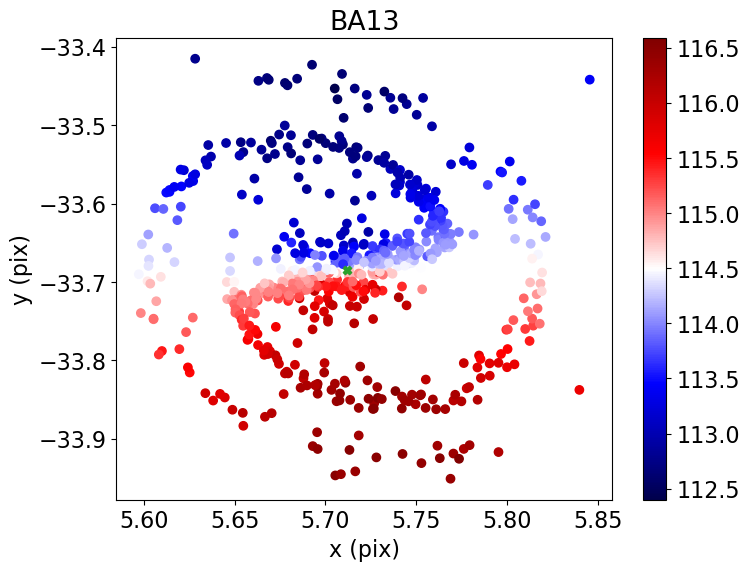

In [92]:
centre = (5.71196328, -33.68406677)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba13 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba13.X,galaxyba13.Y,c=galaxyba13.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA13')

19952.62314968879

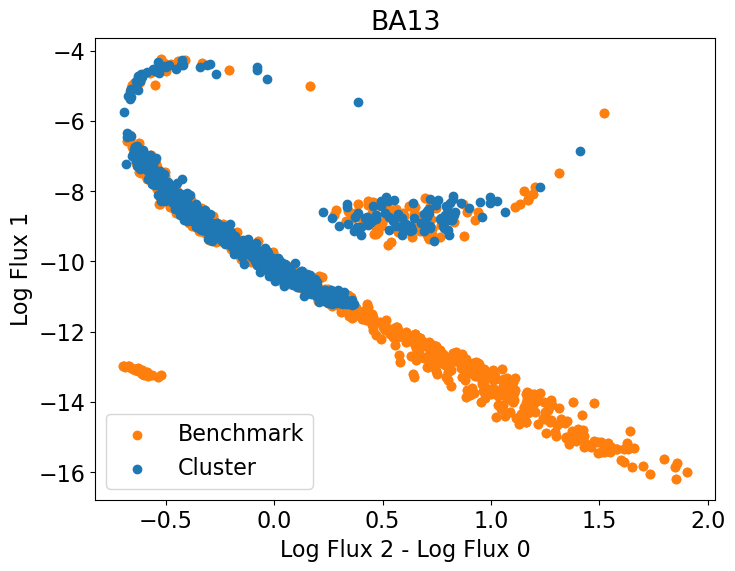

In [93]:
m0, m1, m2 = (np.log10(galaxyba13['BlueF']), 
              np.log10(galaxyba13['GreenF']), 
              np.log10(galaxyba13['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA13')
10**(8.6/2)

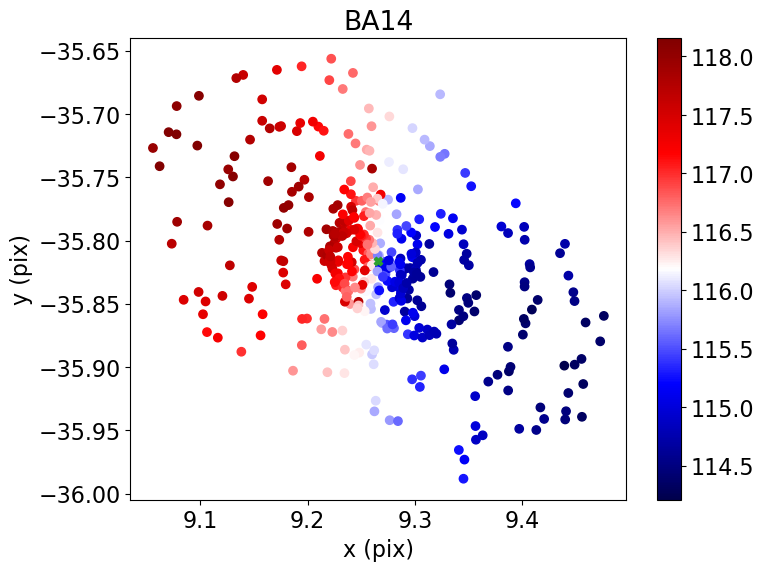

In [94]:
centre = (9.26548462, -35.81633573)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba14 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba14.X,galaxyba14.Y,c=galaxyba14.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA14');


17782.794100389227

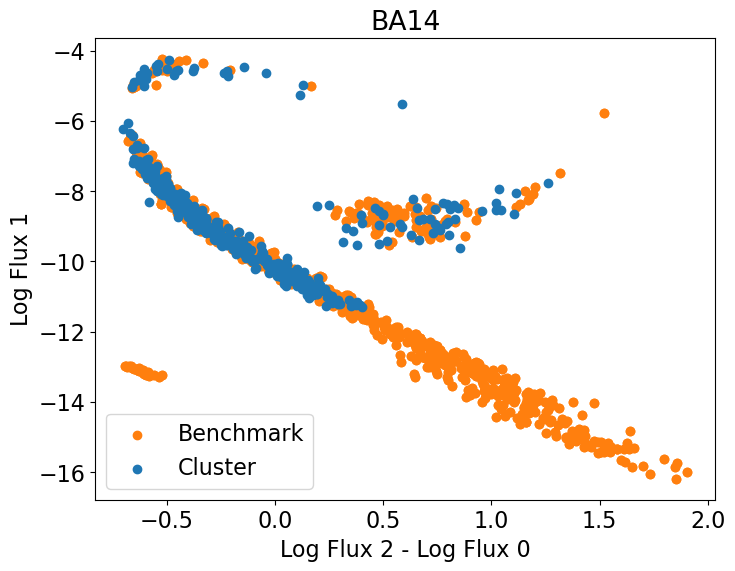

In [95]:
m0, m1, m2 = (np.log10(galaxyba14['BlueF']), 
              np.log10(galaxyba14['GreenF']), 
              np.log10(galaxyba14['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA14')
10**(8.5/2)

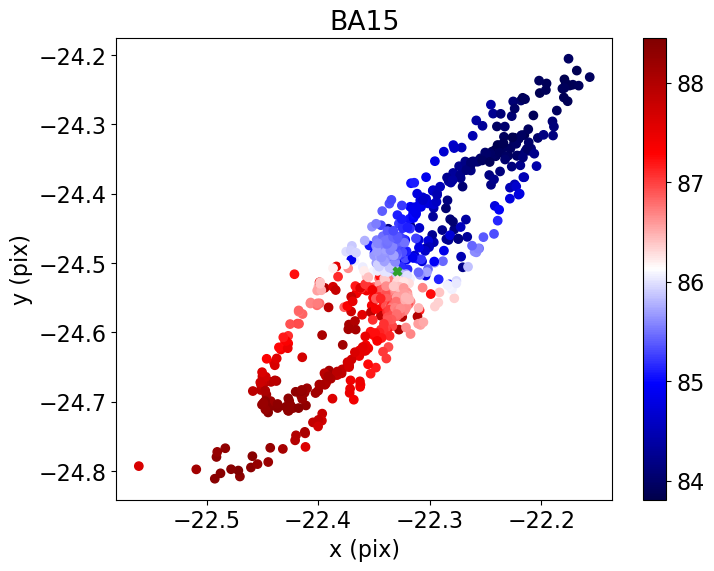

In [96]:
centre = (-22.32923073, -24.51114134)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba15 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba15.X,galaxyba15.Y,c=galaxyba15.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA15');

11220.18454301963

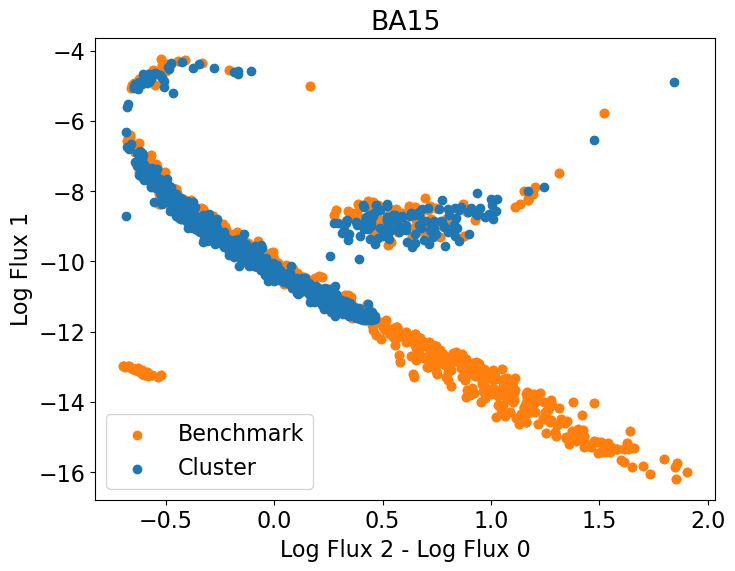

In [97]:
m0, m1, m2 = (np.log10(galaxyba15['BlueF']), 
              np.log10(galaxyba15['GreenF']), 
              np.log10(galaxyba15['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.1,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA15')
10**(8.1/2)

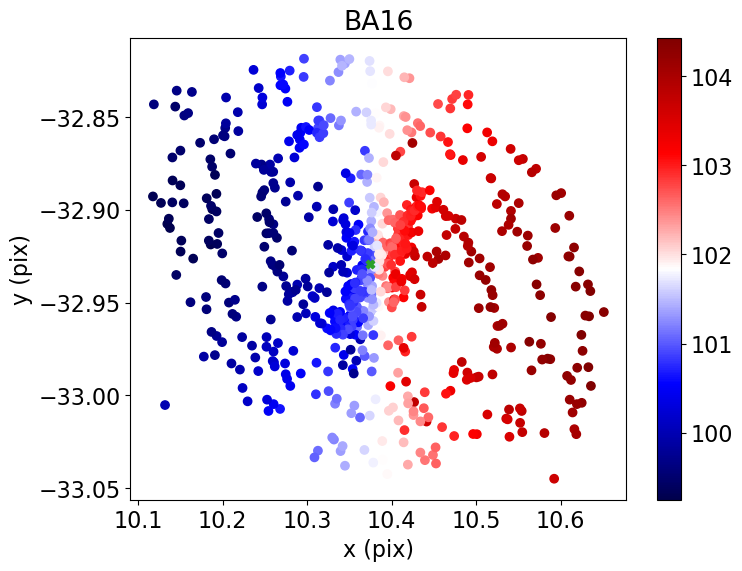

In [98]:
centre = (10.37419578, -32.92942329)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba16 = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba16.X,galaxyba16.Y,c=galaxyba16.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA16');

22387.21138568338

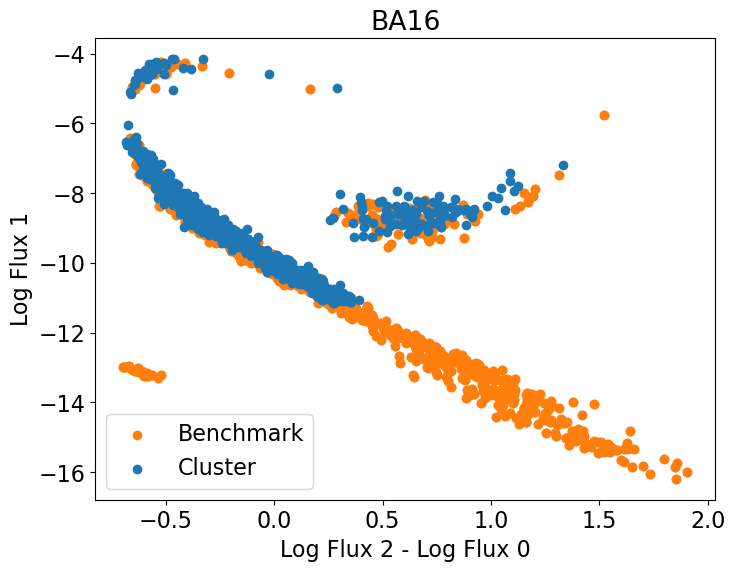

In [99]:
m0, m1, m2 = (np.log10(galaxyba16['BlueF']), 
              np.log10(galaxyba16['GreenF']), 
              np.log10(galaxyba16['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.7,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA16')
10**(8.7/2)

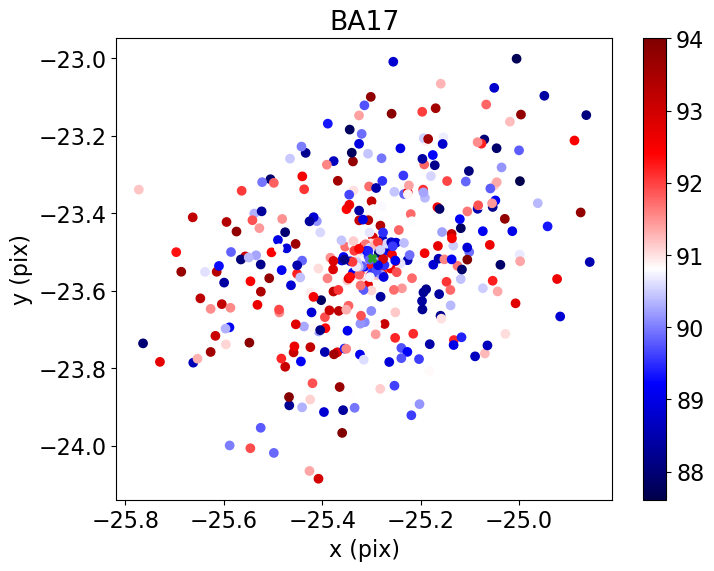

In [100]:
centre = (-25.29921244, -23.51684139)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba17 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba17.X,galaxyba17.Y,c=galaxyba17.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA17');

14125.375446227554

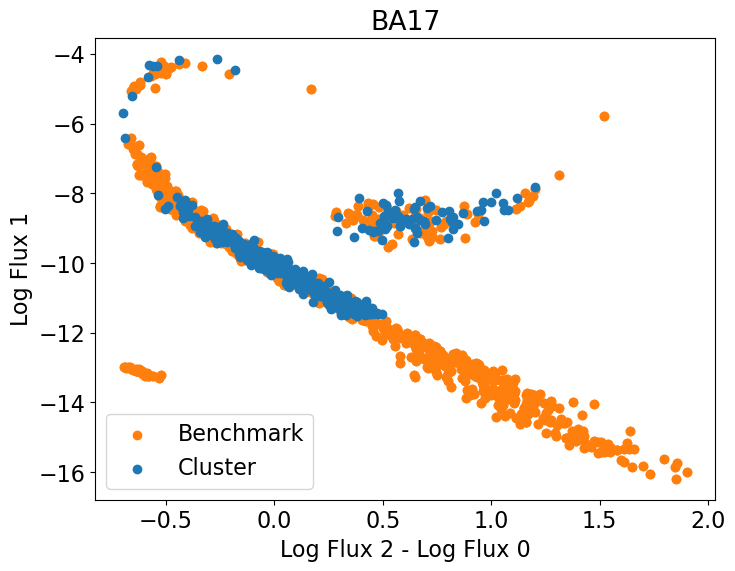

In [101]:
m0, m1, m2 = (np.log10(galaxyba17['BlueF']), 
              np.log10(galaxyba17['GreenF']), 
              np.log10(galaxyba17['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.3,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA17')
10**(8.3/2)

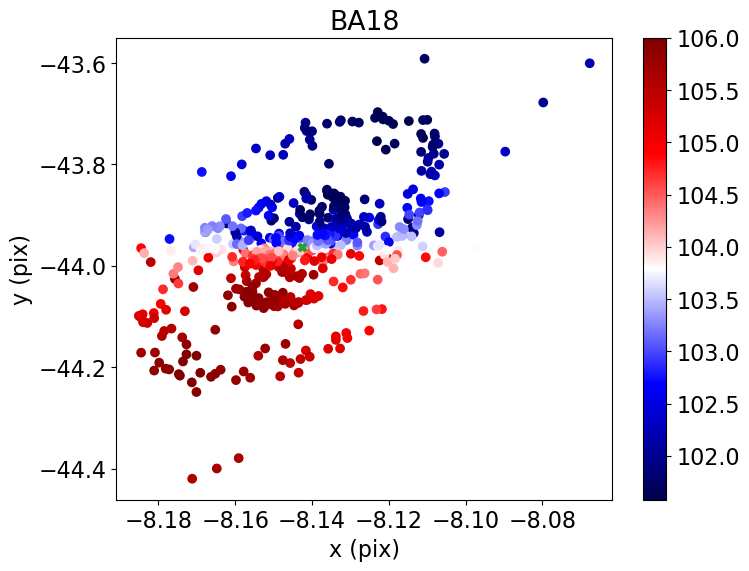

In [102]:
centre = (-8.14270442, -43.96367691)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba18 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba18.X,galaxyba18.Y,c=galaxyba18.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA18');

19952.62314968879

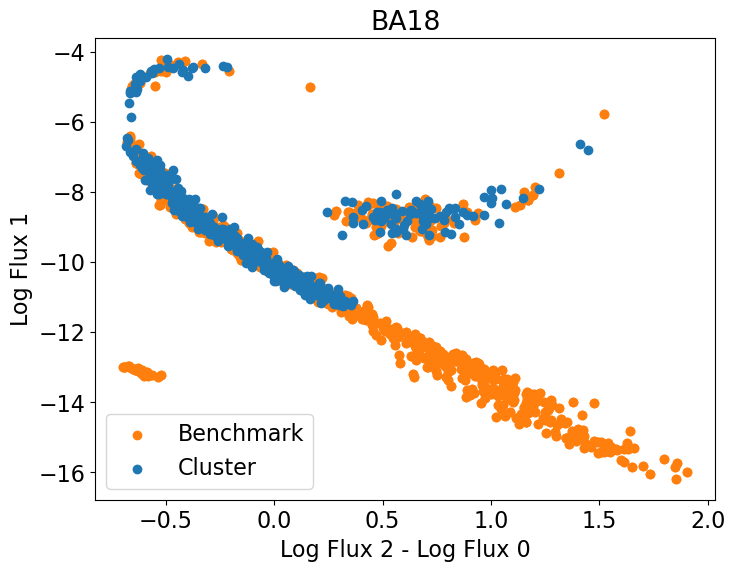

In [103]:
m0, m1, m2 = (np.log10(galaxyba18['BlueF']), 
              np.log10(galaxyba18['GreenF']), 
              np.log10(galaxyba18['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA18')
10**(8.6/2)

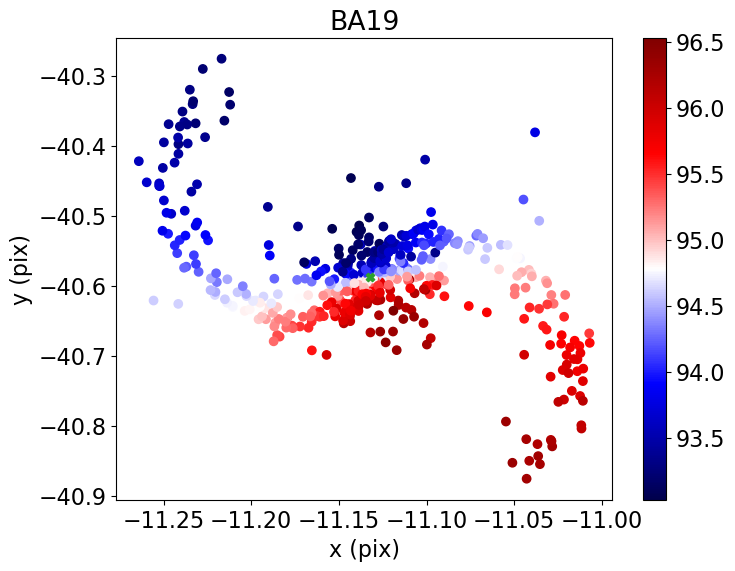

In [104]:
centre = (-11.13208013, -40.58794292)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba19 = backstars[d<1] # filter to only close ones
plt.scatter(galaxyba19.X,galaxyba19.Y,c=galaxyba19.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA19');

19952.62314968879

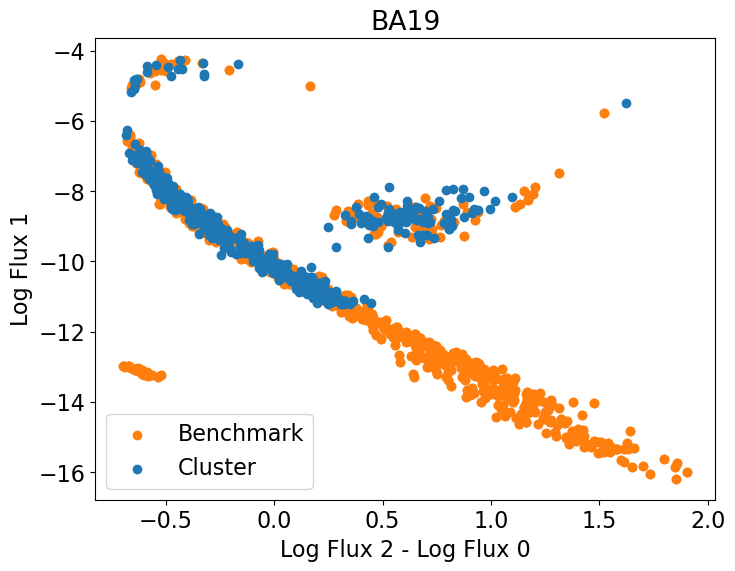

In [105]:
m0, m1, m2 = (np.log10(galaxyba19['BlueF']), 
              np.log10(galaxyba19['GreenF']), 
              np.log10(galaxyba19['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA19')
10**(8.6/2)

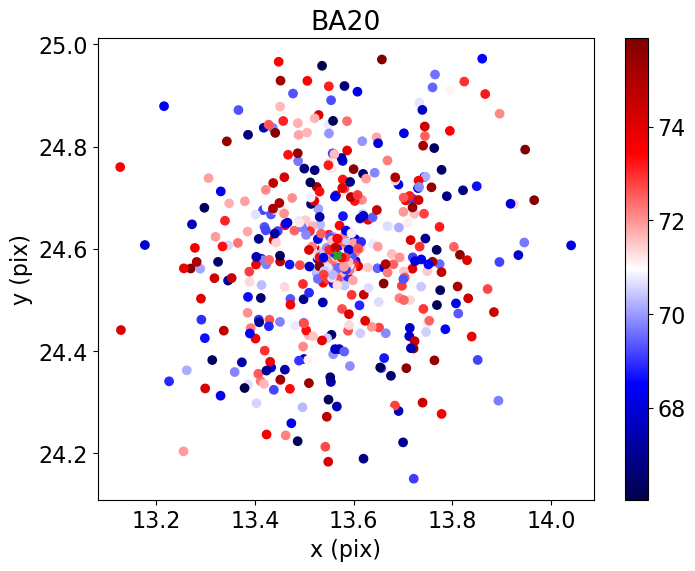

In [106]:
centre = (13.56565183,  24.58746981)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba20 = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba20.X,galaxyba20.Y,c=galaxyba20.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA20');

28183.82931264455

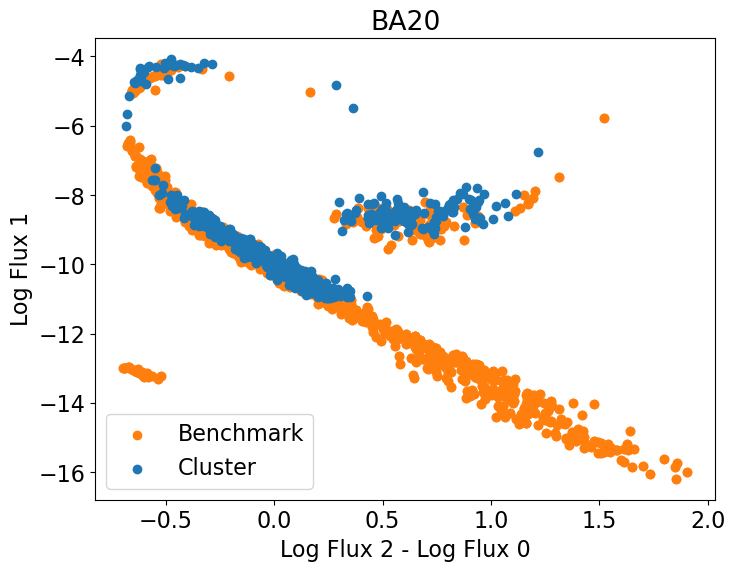

In [107]:
m0, m1, m2 = (np.log10(galaxyba20['BlueF']), 
              np.log10(galaxyba20['GreenF']), 
              np.log10(galaxyba20['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.9,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA20')
10**(8.9/2)

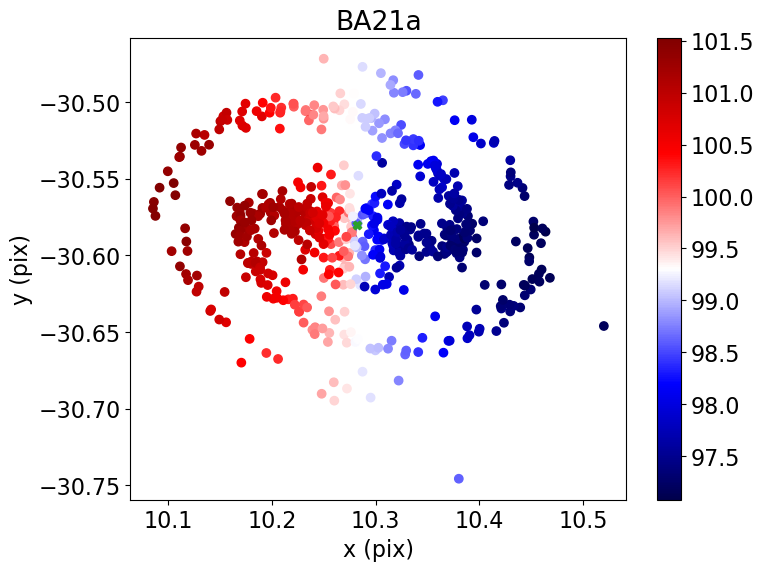

In [108]:
centre = (10.28218743, -30.58019354)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba21a = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba21a.X,galaxyba21a.Y,c=galaxyba21a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA21a');

17782.794100389227

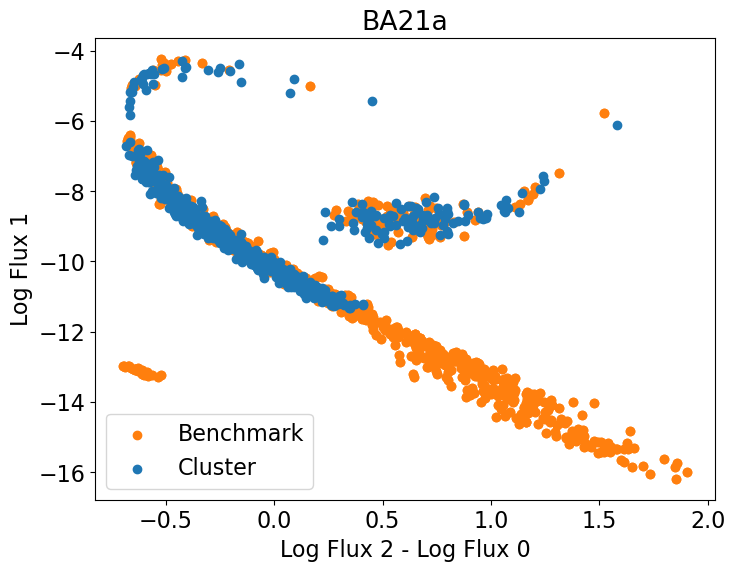

In [109]:
m0, m1, m2 = (np.log10(galaxyba21a['BlueF']), 
              np.log10(galaxyba21a['GreenF']), 
              np.log10(galaxyba21a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA21a')
10**(8.5/2)

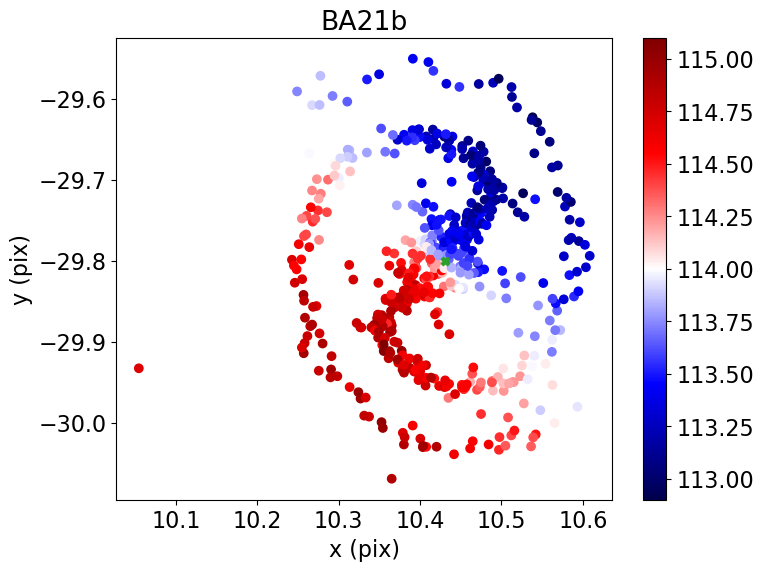

In [110]:
centre = (10.43, -29.8)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba21b = backstars[d<0.4] # filter to only close ones
plt.scatter(galaxyba21b.X,galaxyba21b.Y,c=galaxyba21b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA21b');

17782.794100389227

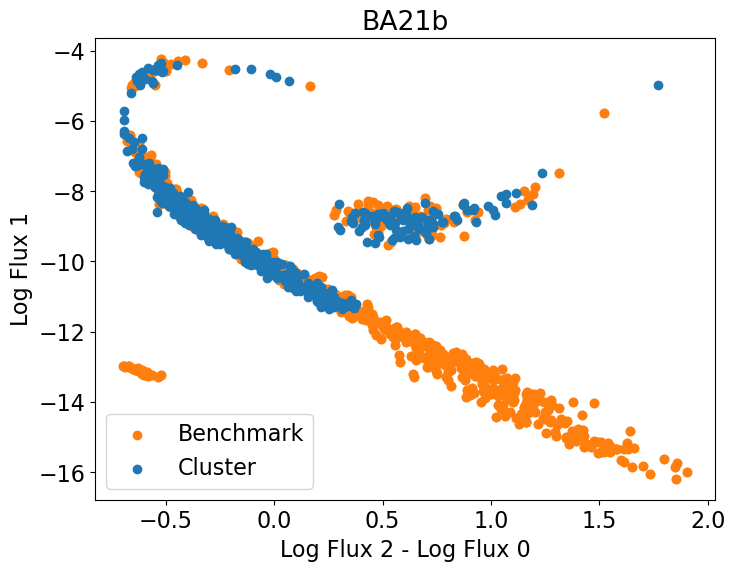

In [111]:
m0, m1, m2 = (np.log10(galaxyba21b['BlueF']), 
              np.log10(galaxyba21b['GreenF']), 
              np.log10(galaxyba21b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.5,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA21b')
10**(8.5/2)

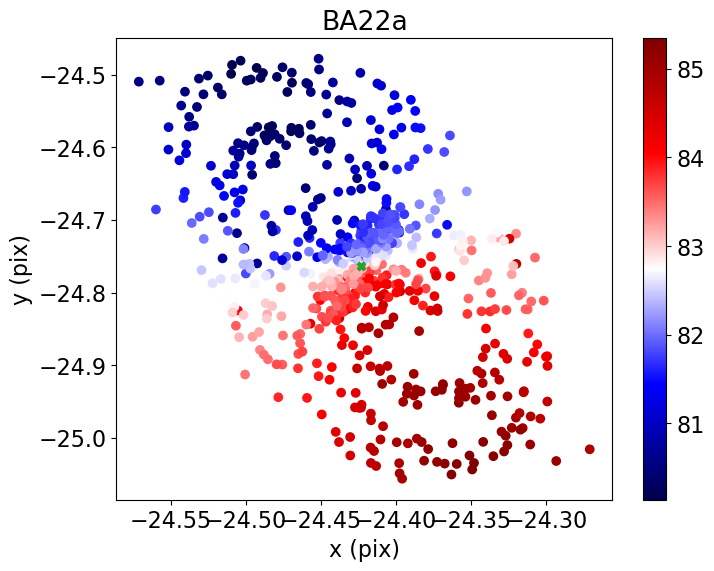

In [112]:
centre = (-24.42321423, -24.76371036)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba22a = backstars[d<0.3] # filter to only close ones
plt.scatter(galaxyba22a.X,galaxyba22a.Y,c=galaxyba22a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA22a');

11220.18454301963

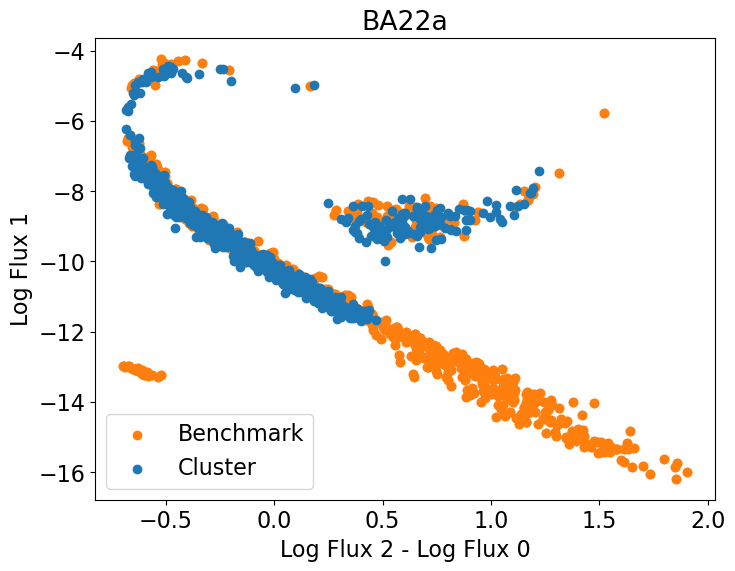

In [113]:
m0, m1, m2 = (np.log10(galaxyba22a['BlueF']), 
              np.log10(galaxyba22a['GreenF']), 
              np.log10(galaxyba22a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.1,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA22a')
10**(8.1/2)

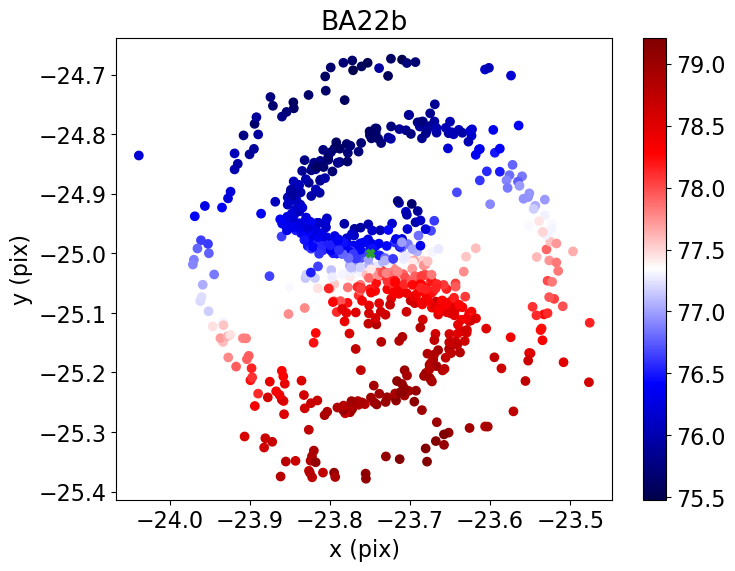

In [114]:
centre = (-23.75, -25)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba22b = backstars[d<0.5] # filter to only close ones
plt.scatter(galaxyba22b.X,galaxyba22b.Y,c=galaxyba22b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA22b');

14125.375446227554

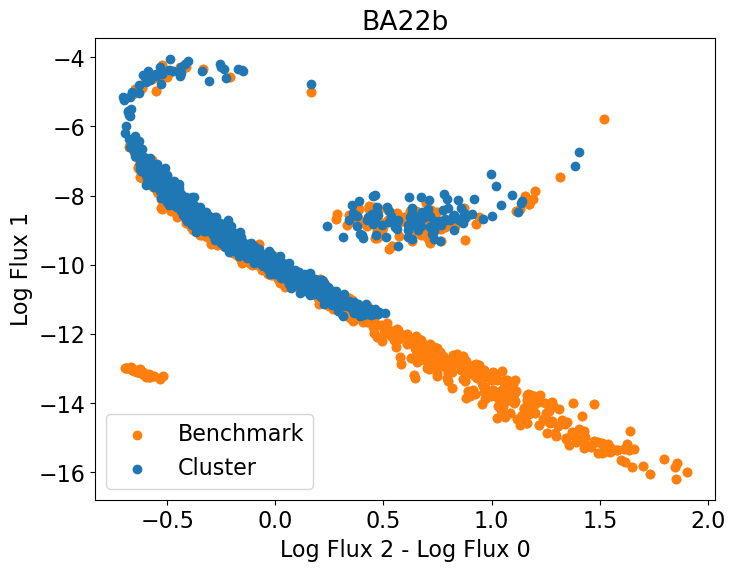

In [115]:
m0, m1, m2 = (np.log10(galaxyba22b['BlueF']), 
              np.log10(galaxyba22b['GreenF']), 
              np.log10(galaxyba22b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.3,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA22b')
10**(8.3/2)

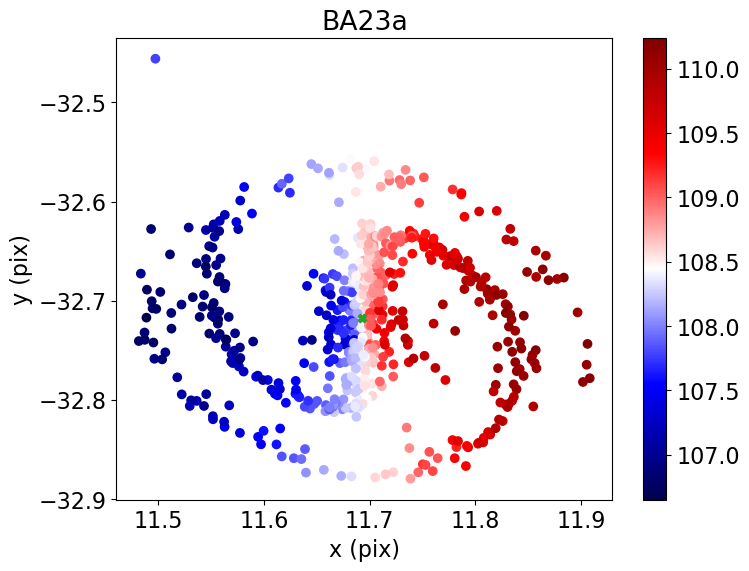

In [116]:
centre = (11.69323639, -32.71761962)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba23a = backstars[d<0.4] # filter to only close ones
plt.scatter(galaxyba23a.X,galaxyba23a.Y,c=galaxyba23a.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA23a');

19952.62314968879

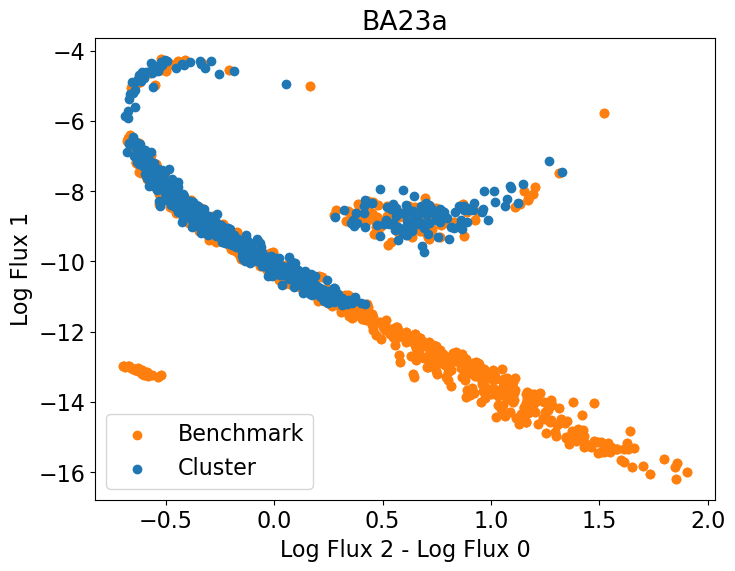

In [117]:
m0, m1, m2 = (np.log10(galaxyba23a['BlueF']), 
              np.log10(galaxyba23a['GreenF']), 
              np.log10(galaxyba23a['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA23a')
10**(8.6/2)

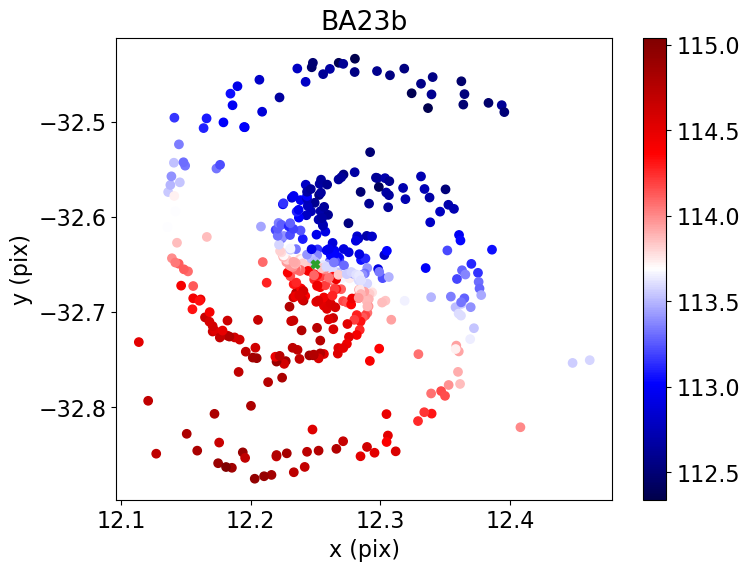

In [118]:
centre = (12.25, -32.65)
d = np.sqrt((backstars.X-centre[0])** 2 + (backstars.Y - centre[1])**2)
galaxyba23b = backstars[d<0.3] # filter to only close ones
plt.scatter(galaxyba23b.X,galaxyba23b.Y,c=galaxyba23b.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('BA23b');

19952.62314968879

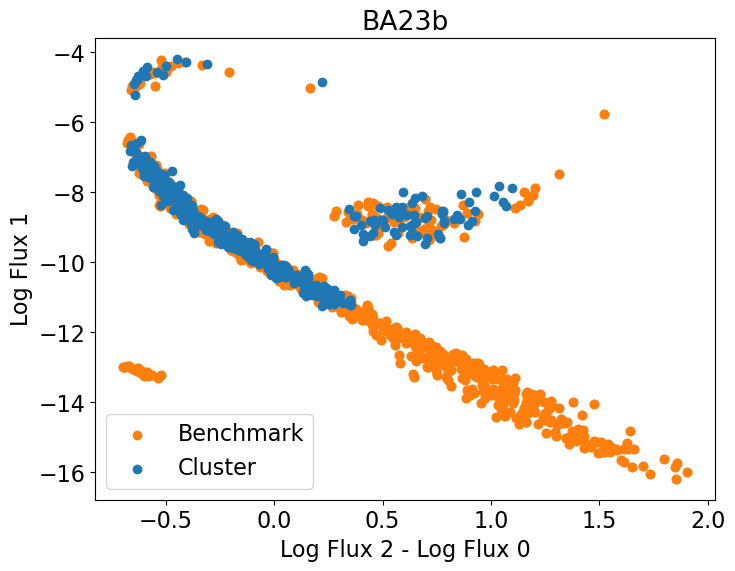

In [119]:
m0, m1, m2 = (np.log10(galaxyba23b['BlueF']), 
              np.log10(galaxyba23b['GreenF']), 
              np.log10(galaxyba23b['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.6,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('BA23b')
10**(8.6/2)

(13120,) (13120,)


Text(0.5, 1.0, 'Right-Reduced')

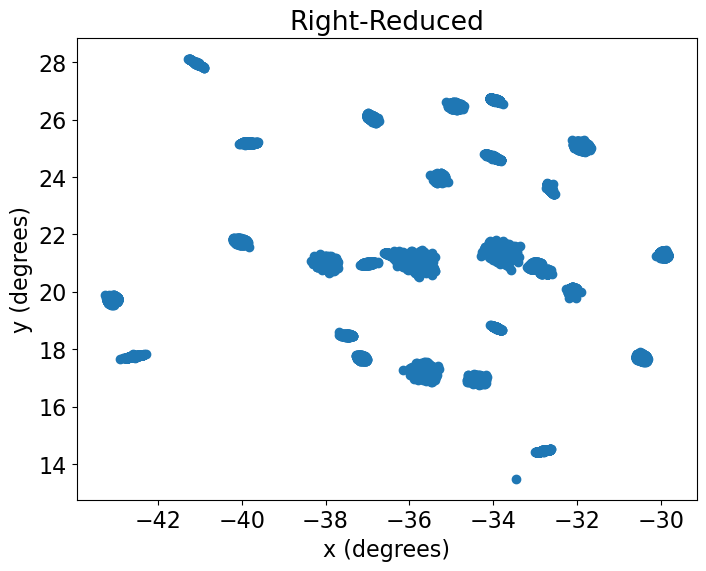

In [120]:
XR=rightstars.X[(rightstars.Y>10)]
YR=rightstars.Y[(rightstars.Y>10)]
# XBA=backstars.X[(backstars.Y>19)]
# YBA=backstars.Y[(backstars.Y>19)]
print(np.shape(YR), np.shape(XR))
CR=np.array(list(zip(XR,YR)))
plt.scatter(CR[:,0], CR[:,1])
plt.xlabel('x (degrees)')
plt.ylabel('y (degrees)');
plt.title('Right-Reduced')

array([[-34.91169077,  26.48088308],
       [-36.10621599,  21.14740551],
       [-30.46265895,  17.70673729],
       [-42.56652526,  17.75448185],
       [-33.91944636,  18.74330568],
       [-39.82382889,  25.18891709],
       [-32.10900301,  20.02991278],
       [-31.89624834,  25.07473991],
       [-35.64744581,  17.23658103],
       [-32.81354093,  14.45652623],
       [-41.07492727,  27.9616048 ],
       [-37.95985252,  20.99711276],
       [-34.0109822 ,  24.69742285],
       [-37.30309953,  18.05402747],
       [-33.79513136,  21.35678136],
       [-43.07699318,  19.72556013],
       [-29.93993916,  21.30469491],
       [-40.02721245,  21.75726285],
       [-36.89233287,  26.06034188],
       [-32.6422437 ,  23.58989169],
       [-35.28781879,  23.9697159 ],
       [-32.89852908,  20.8153896 ],
       [-34.38562092,  16.9421851 ],
       [-33.96609059,  26.68595317],
       [-36.98651697,  20.98872034]])

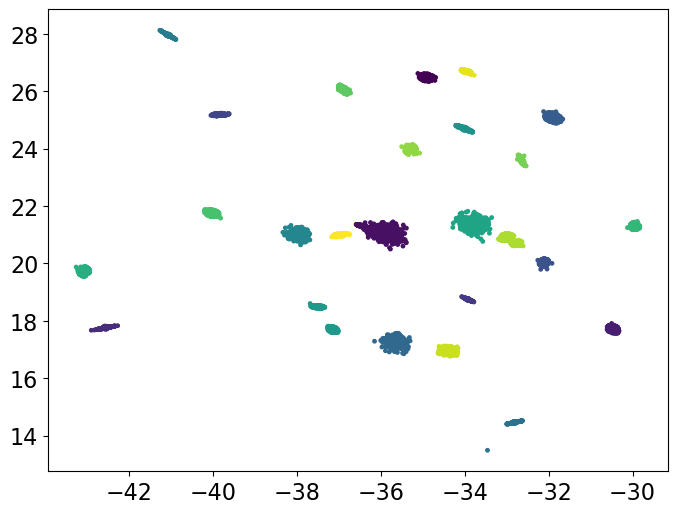

In [121]:
kmeans=KMeans(n_clusters=25)
kmeans.fit(CR)
plt.scatter(CR[:,0], CR[:,1],s=6, c=kmeans.labels_)
xr = kmeans.cluster_centers_
xr

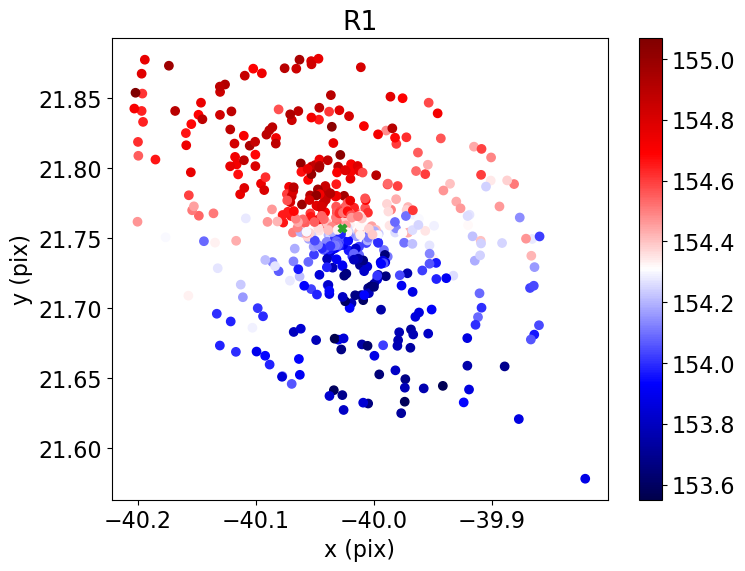

In [122]:
centre = (-40.02721245,  21.75726285)
d = np.sqrt((rightstars.X-centre[0])** 2 + (rightstars.Y - centre[1])**2)
galaxyr1 = rightstars[d<1] # filter to only close ones
plt.scatter(galaxyr1.X,galaxyr1.Y,c=galaxyr1.RadialVelocity,cmap=mpl.cm.seismic) # let's overplot the radial velocities
plt.colorbar()
plt.scatter(*centre,color='C2',marker='X') # * expands the elements of a list 
plt.xlabel('x (pix)')
plt.ylabel('y (pix)')
plt.title('R1');

28183.82931264455

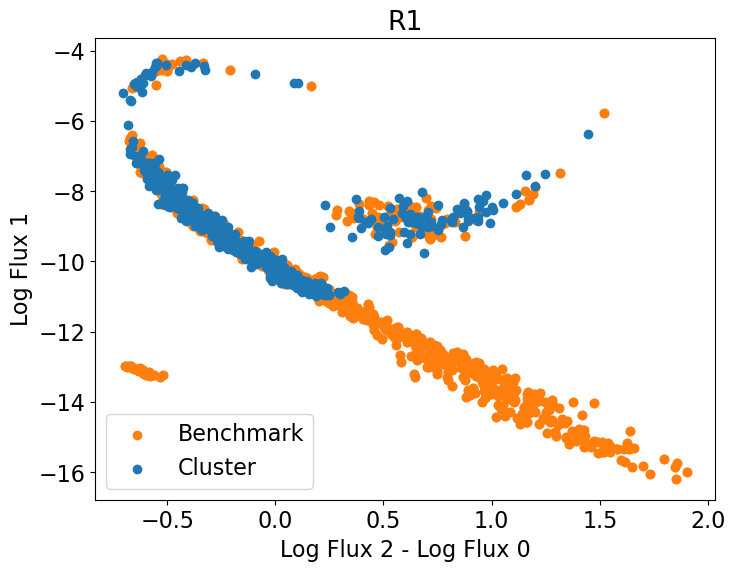

In [123]:
m0, m1, m2 = (np.log10(galaxyr1['BlueF']), 
              np.log10(galaxyr1['GreenF']), 
              np.log10(galaxyr1['RedF'])) 
colour = m2-m0

#sf1 = plt.scatter(colour,m1)
#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

import glob # this package lets you search for filenames
import os

all_stars = glob.glob(ddir+'*/Star_Data.csv')

fig, ax1 = plt.subplots(1,1)
for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

#plt.ylabel('Log Flux 1')
#plt.xlabel('Log Flux 2 - Log Flux 0')

#fig = plt.figure()

for j, catalog in enumerate(all_stars):
    try:
        this = pd.read_csv(catalog)
        
        thispar = this.Parallax
        thism0, thism1, thism2 = (np.log10(this.BlueF), 
                                  np.log10(this.GreenF), 
                                  np.log10(this.RedF))
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.010 # only pick the ones with good signal-to-noise - 10 mas is ok 
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color='C1')
    except:
        pass

s = plt.scatter(colour,m1+8.9,color='C0')

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])
plt.title('R1')
10**(8.9/2)

In [124]:
galaxyr1

Name        X        Y         BlueF        GreenF  \
8891  RightS117404 -40.0539  21.7678  1.206000e-20  1.516000e-20   
8892  RightS117405 -40.0769  21.7613  9.283000e-19  1.655000e-18   
8893  RightS117406 -40.0223  21.7538  2.611000e-20  2.993000e-20   
8894  RightS117414 -40.0065  21.7467  1.288000e-20  1.817000e-20   
8895  RightS117424 -40.0246  21.7639  8.491000e-19  7.721000e-19   
...            ...      ...      ...           ...           ...   
9384  RightS118352 -40.1685  21.8410  1.139000e-17  8.747000e-18   
9385  RightS118353 -39.8892  21.6586  2.133000e-18  1.877000e-18   
9386  RightS118354 -40.1942  21.8776  3.034000e-19  2.885000e-19   
9387  RightS118355 -40.1738  21.8733  7.179000e-18  5.686000e-18   
9388  RightS118356 -39.8772  21.6210  2.418000e-18  2.039000e-18   

              RedF  Parallax  RadialVelocity  Variable?  
8891  1.721000e-20    -0.001          154.61          0  
8892  3.831000e-18    -0.000          154.66          0  
8893  2.785000e-20    -0.000          154.19          0  
8894  2.662000e-20    -0.000          154.03          0  
8895  4.629000e-19     0.000          154.39          0  
...            ...       ...             ...        ...  
9384  3.779000e-18     0.001          154.90          1  
9385  1.057000e-18     0.000          153.69          0  
9386  1.951000e-19     0.000          154.76          0  
9387  2.588000e-18     0.001          154.98          1  
9388  1.056000e-18     0.001          153.87          0  

[498 rows x 9 columns]

In [126]:
P1= [-40.02721245,  21.75726285] 

#P2= np.array[galaxyr1.X, galaxyr1.Y]
# P2= [-39.8, 21.57]

distance = math.sqrt(((P1[0] - P2[0]) ** 2) + ((P1[1] - P2[1]) ** 2))

NameError: name 'P2' is not defined

In [127]:
galaxyr1.X

8891   -40.0539
8892   -40.0769
8893   -40.0223
8894   -40.0065
8895   -40.0246
         ...   
9384   -40.1685
9385   -39.8892
9386   -40.1942
9387   -40.1738
9388   -39.8772
Name: X, Length: 498, dtype: float64

In [128]:
print(distance)


NameError: name 'distance' is not defined

In [129]:
print(distance*3600)
arc = distance*3600


NameError: name 'distance' is not defined

In [ ]:
distancer = 1 / arc

print(distancer)

In [ ]:
plt.scatter(distance, galaxyr1.RadialVelocity)
x= ('radius of galaxy') 
y= ('radial velocity (km/s)')

In [130]:
a = 21.57-21.75726285
print (a)
b= -39.8 - -40.02721245
print (b)


-0.18726284999999976
0.22721245000000323


In [131]:
print (abs(a))



0.18726284999999976


In [132]:
r = math.sqrt((a**2) + (b**2))
print(r)

0.29443653378126566


In [133]:
import math


In [134]:
r = math.sqrt((a**2) + (b**2))
print(r)
R=np.linspace(r)

0.29443653378126566


In [142]:
#plt.scatter(r,galaxyr1.RadialVelocity)
print(len(r,galaxye1.RadialVelocity))

NameError: name 'galaxye1' is not defined

ValueError: x and y must have same first dimension, but have shapes (1,) and (498,)

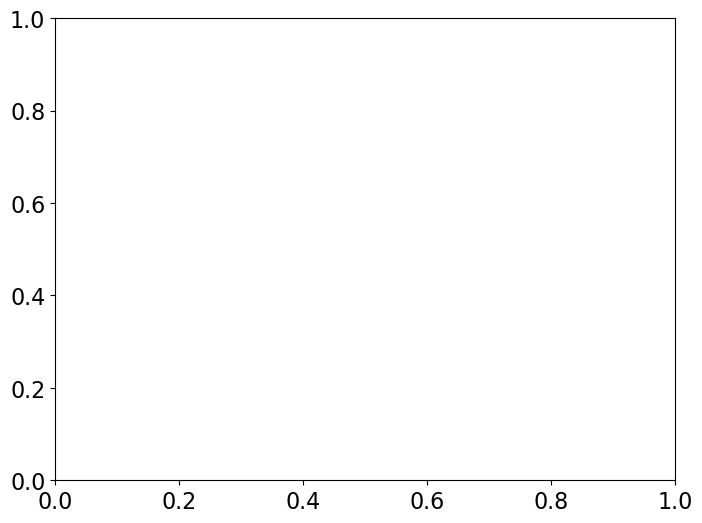

In [140]:
galaxyr1 = rightstars[d<1]
plt.scatter(r,galaxyr1.RadialVelocity)
plt.plot(r, galaxyr1.RadialVelocity)

In [144]:
A = galaxyr1.X-centre[0]
print (A)



8891   -0.026688
8892   -0.049688
8893    0.004912
8894    0.020712
8895    0.002612
          ...   
9384   -0.141288
9385    0.138012
9386   -0.166988
9387   -0.146588
9388    0.150012
Name: X, Length: 498, dtype: float64


In [146]:
B = galaxyr1.Y-centre[0]
print(B)

8891    61.795012
8892    61.788512
8893    61.781012
8894    61.773912
8895    61.791112
          ...    
9384    61.868212
9385    61.685812
9386    61.904812
9387    61.900512
9388    61.648212
Name: Y, Length: 498, dtype: float64


In [148]:
R = numpy.sqrt((A**2) + (B**2))
print(R)

NameError: name 'numpy' is not defined

In [149]:
import numpy as np


In [150]:
R = np.sqrt((A**2) + (B**2))
print(R)

8891    61.795018
8892    61.788532
8893    61.781013
8894    61.773916
8895    61.791113
          ...    
9384    61.868374
9385    61.685967
9386    61.905038
9387    61.900686
9388    61.648395
Length: 498, dtype: float64


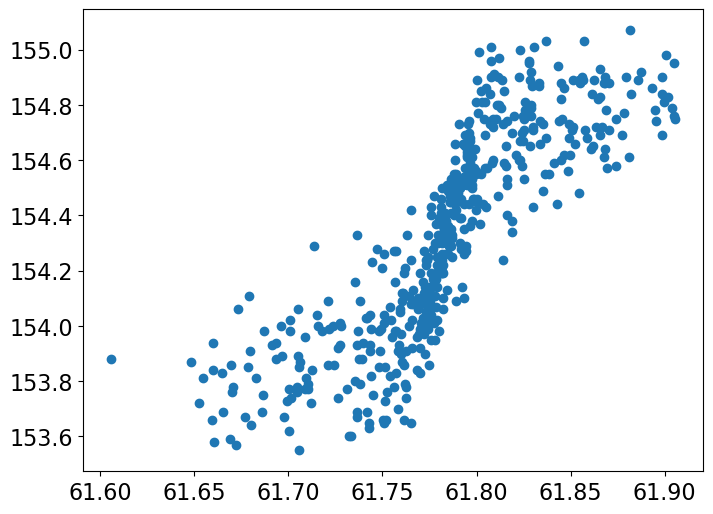

In [163]:
galaxyr1 = rightstars[d<1]
plt.scatter(abs(R),abs(galaxyr1.RadialVelocity))
#plt.plot(r, galaxyr1.RadialVelocity)

In [158]:
centre = (10.43, -29.8)
#galaxyba21b = backstars[d<0.4]
A21b = galaxyba21b.X-centre[0]
print (A21b)







a
B21b = galaxyba21b.Y-centre[0]
print(B21b)

5654    0.0191
5655    0.0060
5656    0.0350
5657    0.0248
5658    0.0709
         ...  
6209   -0.1535
6210   -0.1812
6211    0.1327
6212    0.1634
6213   -0.1665
Name: X, Length: 560, dtype: float64
5654   -40.2372
5655   -40.2204
5656   -40.0951
5657   -40.2001
5658   -40.2427
         ...   
6209   -40.0377
6210   -40.0210
6211   -40.3836
6212   -40.4105
6213   -40.0976
Name: Y, Length: 560, dtype: float64


In [159]:
R21b = np.sqrt((A21b**2) + (B21b**2))
print(R21b)

5654    40.237205
5655    40.220400
5656    40.095115
5657    40.200108
5658    40.242762
          ...    
6209    40.037994
6210    40.021410
6211    40.383818
6212    40.410830
6213    40.097946
Length: 560, dtype: float64


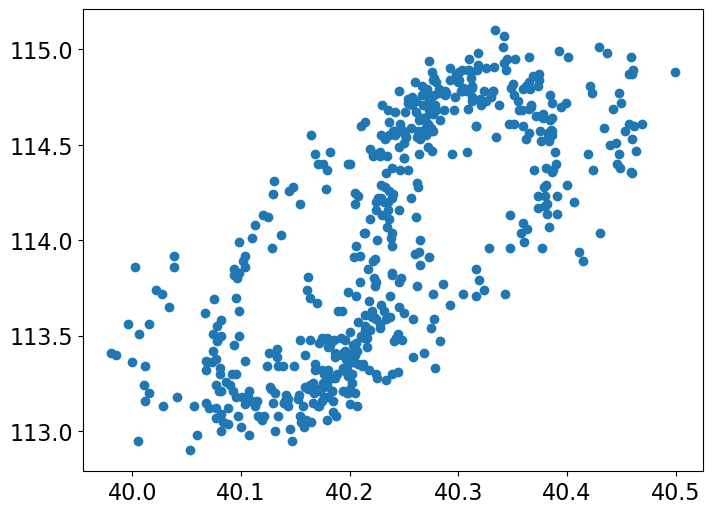

In [164]:
#galaxyba21b = backstars[d<0.4]
plt.scatter(abs(R21b),abs(galaxyba21b.RadialVelocity))

In [165]:
centre = (-10.94783942, -17.60958602)
Af3 = galaxyf3.X-centre[0]
print (Af3)



Bf3 = galaxyf3.Y-centre[0]
print(Bf3)



15427   -0.086261
15428   -0.358361
15429    0.195139
15430    0.321039
15431    0.120439
           ...   
20991    0.258939
20992    0.998439
22713   -1.558161
22741   -0.125961
22749    0.773539
Name: X, Length: 1844, dtype: float64
15427    -9.896261
15428    -9.539361
15429    -9.263661
15430    -9.425861
15431    -9.948761
           ...    
20991    -0.352561
20992    -1.640561
22713    -3.252761
22741   -10.279761
22749   -11.486661
Name: Y, Length: 1844, dtype: float64


In [166]:
Rf3 = np.sqrt((Af3**2) + (Bf3**2))
print(Rf3)

15427     9.896637
15428     9.546089
15429     9.265716
15430     9.431326
15431     9.949490
           ...    
20991     0.437434
20992     1.920500
22713     3.606704
22741    10.280532
22749    11.512677
Length: 1844, dtype: float64


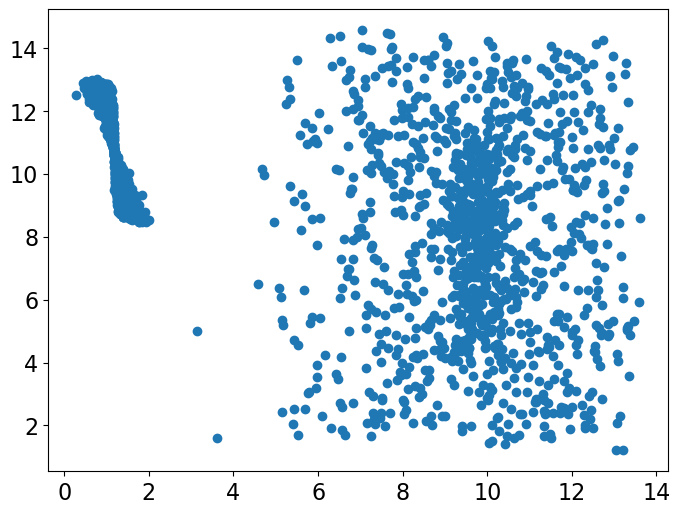

In [167]:
plt.scatter(abs(Rf3),abs(galaxyf3.RadialVelocity))

In [176]:
centre = (-11.13208013, -40.58794292)
Aba19 = galaxyba19.X-centre[0]
print (Aba19)



Bba19 = galaxyba19.Y-centre[0]
print(Bba19)


10240   -0.00092
10241   -0.00142
10242    0.06648
10243    0.02588
10244    0.00588
          ...   
10708    0.09068
10709    0.08918
10710   -0.07992
10711   -0.09552
10712   -0.08482
Name: X, Length: 473, dtype: float64
10240   -29.48642
10241   -29.45932
10242   -29.50602
10243   -29.45582
10244   -29.45602
           ...   
10708   -29.71812
10709   -29.74372
10710   -29.20932
10711   -29.15822
10712   -29.14362
Name: Y, Length: 473, dtype: float64


In [177]:
Rba19 = np.sqrt((Aba19**2) + (Bba19**2))
print(Rba19)

10240    29.486420
10241    29.459320
10242    29.506095
10243    29.455831
10244    29.456020
           ...    
10708    29.718258
10709    29.743854
10710    29.209429
10711    29.158376
10712    29.143743
Length: 473, dtype: float64


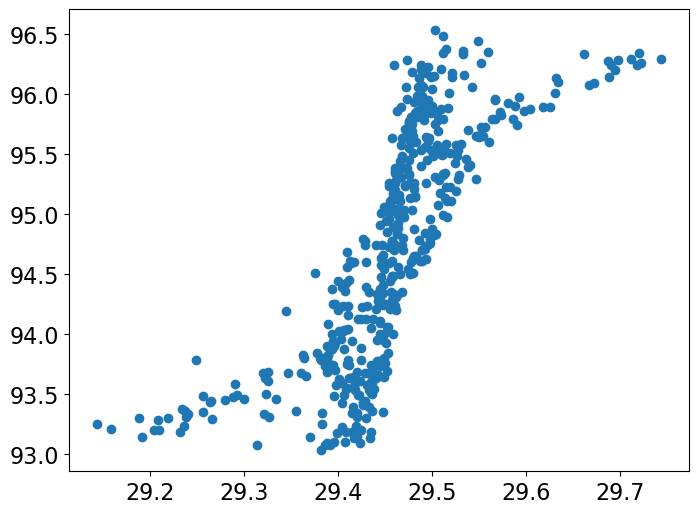

In [178]:
#galaxyba7a = backstars[d<0.5] 
plt.scatter(abs(Rba19),abs(galaxyba19.RadialVelocity))